# USED CARS PRICE PREDICTION 

## `Problem statement` -
With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some
cars are in demand hence making them costly and some are not in demand hence cheaper. One
of our clients works with small traders, who sell used cars. With the change in market due to covid
19 impact, our client is facing problems with their previous car price valuation machine learning
models. So, they are looking for new machine learning models from new data. We have to make
car price valuation model. 

This project has two phases -


### 1. Data Collection Phase
We have scraped the used cars data from cardekho website. We have fetched the data for different locations. The number of columns for data includes all the sepecifications such as Brand, model, variant, manufacturing year, driven kilometers, fuel, number of owners, location and
at last target variable Price of the car.Here we have included all types of cars in the data for example- SUV, Sedans, Coupe, minivan, Hatchback. This data is saved in the excel format.

### 2. Model Building Phase
After collecting the data, we need to build a machine learning model. Before model building we shall clean data using all data pre-processing steps. Then we would try different models with different hyper parameters and select the best model.



In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#To print all columns and rows
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
#importing dataset
df = pd.read_excel("Used_Cars.xlsx") #Reading excel file
#df.head()

## Observations

- Since Unnamed: 0 is an index column we can drop it from the dataset


## GOAL 
- we have to predict the used car price. 

The Car_Price column is in continuous data, hence it is a `Regression problem`.

In [4]:
#Droping unnecessary column
df = df.drop(["Unnamed: 0"],axis=1)

In [5]:
#Checking shape of the dataset
df.shape

(12608, 20)

My dataset has 12608 rows and 20 columns.

In [6]:
#Checking all column names
df.columns

Index(['Car_Name', 'Fuel_type', 'Running_in_kms', 'Engine_disp',
       'Gear_transmission', 'Milage_in_km/ltr', 'Seating_cap', 'color',
       'Max_power', 'front_brake_type', 'rear_brake_type', 'cargo_volume',
       'height', 'width', 'length', 'Weight', 'Insp_score', 'top_speed',
       'City_url', 'Car_price'],
      dtype='object')

Above are the list of column names in the dataset.

# Feature description:

- Car_Name : Name of the car with Year
- Fuel_type : Type of fuel used for car engine
- Running_in_kms : Car running in kms till the date
- Engine_disp : Engine displacement/engine CC
- Gear_transmission : Type of gear transmission used in car
- Milage_in_km/ltr : Overall milage of car in Km/ltr
- Seating_cap : Availability of number of seats in the car
- color : Car color
- Max_power : Maximum power of engine used in car in bhp
- front_brake_type : type of brake system used for front-side wheels
- rear_brake_type : type of brake system used for back-side wheels
- cargo_volume : the total cubic feet of space in a car's cargo area.
- height : Total height of car in mm
- width : Width of car in mm
- length : TOtal length of the car in mm
- Weight : Gross weight of the car in kg
- Insp_score : inspection rating out of 10
- top_speed : Maximum speed limit of the car in km per hours
- City_url : Url of the page of cars from a particular city
- Car_price : Price of the car

In [7]:
#Checking for missing values
df.isnull().sum()

Car_Name                0
Fuel_type               0
Running_in_kms          0
Engine_disp             0
Gear_transmission       0
Milage_in_km/ltr        0
Seating_cap            55
color                   0
Max_power               1
front_brake_type       76
rear_brake_type        76
cargo_volume          447
height                 56
width                  56
length                 56
Weight                 37
Insp_score              0
top_speed            1798
City_url                0
Car_price               0
dtype: int64

There are some entries like '-' and 'null' so let's replace these with nan.

In [8]:
#Replacing unnecessary entries with nan
df.replace('-',np.nan, inplace = True)
df.replace('null ',np.nan, inplace = True)

In [9]:
#Checking for nan values again
df.isnull().sum()

Car_Name                 0
Fuel_type                0
Running_in_kms           0
Engine_disp             60
Gear_transmission        0
Milage_in_km/ltr        29
Seating_cap            104
color                  274
Max_power              145
front_brake_type       214
rear_brake_type        215
cargo_volume          8388
height                 254
width                  255
length                 254
Weight                6074
Insp_score           10876
top_speed             4316
City_url                 0
Car_price                0
dtype: int64

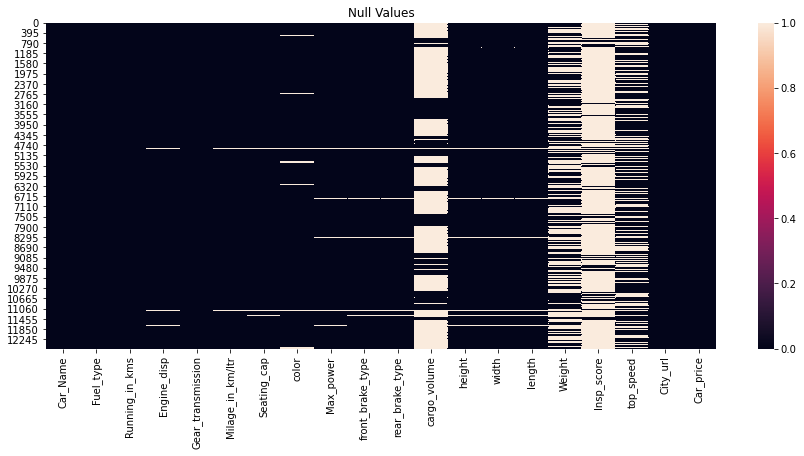

In [10]:
#Visualizing null values
plt.figure(figsize=[15,6])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

## Observations 

By visualization of null values we can clearly say that 

- There are huge null values in the following columns of the dataset-
    - cargo_volume
    - Weight
    - Insp_score
    - top_speed         

- There are few missing values in the following columns
    - Engine_disp
    - Milage_in_km/ltr
    - Seating_cap
    - color
    - Max_power
    - front_brake_type
    - rear_brake_type
    - height
    - width
    - length

- We can drop those columns with more than 50% missing values and others with less than 50% missing values can be replaced using iteration methods

In [11]:
#Dropping columns with more than 50% of missiing values
df.drop(columns = ['cargo_volume','Insp_score','Weight','top_speed'], inplace = True)

We have dropped the above columns

In [12]:
#Checking the info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12608 entries, 0 to 12607
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_Name           12608 non-null  object
 1   Fuel_type          12608 non-null  object
 2   Running_in_kms     12608 non-null  object
 3   Engine_disp        12548 non-null  object
 4   Gear_transmission  12608 non-null  object
 5   Milage_in_km/ltr   12579 non-null  object
 6   Seating_cap        12504 non-null  object
 7   color              12334 non-null  object
 8   Max_power          12463 non-null  object
 9   front_brake_type   12394 non-null  object
 10  rear_brake_type    12393 non-null  object
 11  height             12354 non-null  object
 12  width              12353 non-null  object
 13  length             12354 non-null  object
 14  City_url           12608 non-null  object
 15  Car_price          12608 non-null  object
dtypes: object(16)
memory usage: 1.5+ MB


## Observations

Above is the info about the dataset and we shall fill these missing values in the dataset using imputation methods.

# Feature Extraction:

## Car_Name: 
As the Car_name column has year of manufacture, car model and car name all together so we shall extract them for better seperated values

In [13]:
#Extracting manufacturing year and car name from Car_Name
df['Manu_year'] = df['Car_Name'].str[0:4]
df['car_name'] = df['Car_Name'].str[4:]
df.drop(columns = 'Car_Name', inplace = True)

In [14]:
df['Car_Brand'] = df.car_name.str.split(' ').str.get(1)
df['Car_Model'] = df.car_name.str.split(' ').str[2:]
df['Car_Model'] = df['Car_Model'].apply(lambda x: ','.join(map(str, x)))
df['Car_Model'] = df['Car_Model'].str.replace(',',' ')
df.drop(columns = 'car_name', inplace = True)

## Car_Price:

Since Car_Price is our target, it shall be in the continuous data format. So we have to change the car_price column from lakhs and crores to integer format.

In [15]:
df['car_price'] = df['Car_price'].str.replace('Lakh','100000')
df['car_price'] = df['car_price'].str.replace(',','')
df['car_price'] = df['car_price'].str.replace('Cr','10000000')

In [16]:
df[['a','b']] = df.car_price.str.split(expand=True)

In [17]:
df['a'] = df['a'].astype('float')
df['b'] = df['b'].astype('float')

Now we have seperated the column with alpha numeric data to replace the values with float type data

In [18]:
#Checking for null values in b column
df.isnull().sum()

Fuel_type              0
Running_in_kms         0
Engine_disp           60
Gear_transmission      0
Milage_in_km/ltr      29
Seating_cap          104
color                274
Max_power            145
front_brake_type     214
rear_brake_type      215
height               254
width                255
length               254
City_url               0
Car_price              0
Manu_year              0
Car_Brand              0
Car_Model              0
car_price              0
a                      0
b                     91
dtype: int64

In [19]:
df['b']=df['b'].fillna(value = 1)

We have filled the nan values in the column

In [20]:
df['car_price'] = df['a'] * df['b']

Now we have converted the data in car_price to float type data

In [21]:
df.drop(columns = ['Car_price','a','b'], inplace = True)

We have dropped the columns as they are redundant

## Running_in_kms:

Since this column should be int datatype but it has some string values and ',' in between so let's replace them.

In [22]:
df['Running_in_kms'] = df['Running_in_kms'].str.replace('kms','')
df['Running_in_kms'] = df['Running_in_kms'].str.replace(',','')
df['Running_in_kms'] = df['Running_in_kms'].str.replace('1 Lakh ','100000')
df['Running_in_kms'] = df['Running_in_kms'].astype('float')

We have replaced the values in the above column with number of km and converted into the float type data

In [23]:
df.dtypes

Fuel_type             object
Running_in_kms       float64
Engine_disp           object
Gear_transmission     object
Milage_in_km/ltr      object
Seating_cap           object
color                 object
Max_power             object
front_brake_type      object
rear_brake_type       object
height                object
width                 object
length                object
City_url              object
Manu_year             object
Car_Brand             object
Car_Model             object
car_price            float64
dtype: object

## Observations

- Most of the columns are in object type data.


## Engine_disp:

The column 'Engine_disp' should be continuous column so we will convert it to float datatype.

In [24]:
df.Engine_disp = df.Engine_disp.astype('float')

we have converted the data type of 'Engine_disp' to float datatype.

## Milage_in_km/ltr:


In Milage_in_km/ltr column the data type is object so we have to change this to float type.

In [25]:
df['Milage_in_km/ltr'] = df['Milage_in_km/ltr'].str.replace('kmpl','')
df['Milage_in_km/ltr'] = df['Milage_in_km/ltr'].str.replace('km/kg','')
df['Milage_in_km/ltr'] = df['Milage_in_km/ltr'].str.replace('km/hr','')

df['Milage_in_km/ltr'] = df['Milage_in_km/ltr'].astype('float')

we have converted the data type of 'Milage_in_km/ltr' to float datatype.

## Converting the data type of columns height, width and length to float datatype:

In [26]:
df['height'] = df['height'].str.replace(',','')
df['height'] = df['height'].str[0:4]
df['width'] = df['width'].str.replace(',','')
df['length'] = df['length'].str.replace(',','')
df.height = df.height.astype('float')
df.width = df.width.astype('float')
df.length = df.length.astype('float')

we have converted the data type of columns height, width and length to float datatype

## City_url:

Let's extract city name from city url column.

In [27]:
#Checking value counts of City_url column
df.City_url.value_counts()

https://www.cardekho.com/used-cars+in+delhi-ncr    1490
https://www.cardekho.com/used-cars+in+bangalore    1486
https://www.cardekho.com/used-cars+in+mumbai       1478
https://www.cardekho.com/used-cars+in+new-delhi    1473
https://www.cardekho.com/used-cars+in+pune         1239
https://www.cardekho.com/used-cars+in+gurgaon      1040
https://www.cardekho.com/used-cars+in+noida         982
https://www.cardekho.com/used-cars+in+hyderabad     918
https://www.cardekho.com/used-cars+in+chennai       836
https://www.cardekho.com/used-cars+in+kolkata       595
https://www.cardekho.com/used-cars+in+ahmedabad     579
https://www.cardekho.com/used-cars+in+jaipur        492
Name: City_url, dtype: int64

The above data shows the no of cars from each of the cities

In [28]:
#Replacing city names from city urls
df['city_name'] = df.City_url.replace('https://www.cardekho.com/used-cars+in+bangalore', 'Bangalore')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+mumbai', 'mumbai')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+chennai', 'Chennai')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+hyderabad', 'hyderabad')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+pune', 'pune')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+delhi-ncr', 'delhi-ncr')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+ahmedabad', 'ahmedabad')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+gurgaon', 'gurgaon')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+noida', 'noida')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+kolkata', 'kolkata')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+jaipur', 'jaipur')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+new-delhi', 'new-delhi')

We have replaced the city names with city urls

In [29]:
#Let's check the value count again
df['city_name'].value_counts()

delhi-ncr    1490
Bangalore    1486
mumbai       1478
new-delhi    1473
pune         1239
gurgaon      1040
noida         982
hyderabad     918
Chennai       836
kolkata       595
ahmedabad     579
jaipur        492
Name: city_name, dtype: int64

Since we have extracted city names let's drop City_url.

In [30]:
#Dropping unnecessary column
df.drop(columns = 'City_url', inplace = True)

we have dropped the city url column as it is redundant

## Seating_cap:

Let's change the data type of seating_cap to float type.

In [31]:
#converting Seating_cap to float data type
df.Seating_cap = df.Seating_cap.astype('float')

## Manu_Year:

Let's extract car age from manufactured year.

In [32]:
df.Manu_year = df.Manu_year.astype('float')
df['Car_age'] = 2021 - df['Manu_year']
df.drop(columns = 'Manu_year', inplace = True)

## Max_power:

We have to change the datatype of Max_power column to float datatype.

In [33]:
#getting numerical values from column Max_power and converting them to float type
df['Max_power'] = df['Max_power'].str[0:5]

In [34]:
df['Max_power'] = df['Max_power'].str.replace('PS','')
df['Max_power'] = df['Max_power'].str.replace('ps','')
df['Max_power'] = df['Max_power'].str.replace('Bh','')
df['Max_power'] = df['Max_power'].str.replace('P','')

In [35]:
df.Max_power = df.Max_power.astype('float')

We have changed the datatype of Max_power column to float datatype.

## front_brake_type:

Let's group the similar entries in this column.

In [36]:
#Checking the value counts of front_brake_type
df['front_brake_type'].value_counts()

Disc                                        6902
Ventilated Disc                             4785
Solid Disc                                   181
Ventilated Discs                             141
Disc & Caliper Type                           83
Disk                                          73
Ventilated DIsc                               51
Ventilated discs                              33
Drum                                          25
Ventilated Disk                               17
Multilateral Disc                             14
264mm Ventilated discs                        13
Electric Parking Brake                        11
Vantilated Disc                               10
Disc & Drum                                    7
Vacuum assisted hydraulic dual circuit w       7
Disc,internally ventilated                     6
Discs                                          6
Disc, 236 mm                                   5
disc                                           4
Ventillated Disc    

The 'front_brake_type' feature has few similar entries which shall be grouped for easy evaluation and better understanding

In [37]:
df["front_brake_type"].replace("Solid Disc","Disc",inplace=True)
df["front_brake_type"].replace("Disk","Disc",inplace=True)
df["front_brake_type"].replace("Discs","Disc",inplace=True)
df["front_brake_type"].replace("Disc, 236 mm","Disc",inplace=True)
df["front_brake_type"].replace("disc","Disc",inplace=True)

df["front_brake_type"].replace("Ventilated Discs","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated DIsc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated discs","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated Disk","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("264mm Ventilated discs","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Vantilated Disc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Disc,internally ventilated","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventlated Disc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventillated Disc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventillated Discs","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Booster assisted ventilated disc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated disc","Ventilated Disc",inplace=True)

We have grouped all the similiar entries into one entry

In [38]:
#Checking the value counts of front_brake_type again
df['front_brake_type'].value_counts()

Disc                                        7171
Ventilated Disc                             5070
Disc & Caliper Type                           83
Drum                                          25
Multilateral Disc                             14
Electric Parking Brake                        11
Disc & Drum                                    7
Vacuum assisted hydraulic dual circuit w       7
Carbon ceramic                                 2
Ventilated & Grooved Steel Discs               1
Dual Circuit with ABS, ABS with BAS            1
Tandem master cylinder with Servo assist       1
Mechanical-hydraulic dual circuit              1
Name: front_brake_type, dtype: int64

We can see that the value counts has reduced due to grouping of similar entries

## rare_brake_type:

Let's group the similar entries in this column.

In [39]:
#Checking value counts of rare_break_type column
df['rear_brake_type'].value_counts()

Drum                                        10022
Disc                                         1409
Ventilated Disc                               296
Solid Disc                                    208
Leading-Trailing Drum                         103
Disc & Caliper Type                            83
Self-Adjusting Drum                            50
Discs                                          42
Ventilated discs                               32
Ventilated Discs                               25
Drums                                          20
262mm Disc & Drum Combination                  13
Disc & Drum                                    12
Self Adjusting Drum                            12
Electric Parking Brake                         11
Leading & Trailing Drum                         8
Ventilated Drum                                 8
Vacuum assisted hydraulic dual circuit w        7
Drums 180 mm                                    5
drum                                            4


The 'rear_brake_type' feature has few similar entries which shall be grouped for easy evaluation and better understanding

In [40]:
df["rear_brake_type"].replace("Drums","Drum",inplace=True)
df["rear_brake_type"].replace("drum","Drum",inplace=True)
df["rear_brake_type"].replace("Drums 180 mm","Drum",inplace=True)
df["rear_brake_type"].replace("Drum in Discs","Drum",inplace=True)
df["rear_brake_type"].replace("Drum in disc","Drum",inplace=True)
 

df["rear_brake_type"].replace("Discs","Disc",inplace=True)
df["rear_brake_type"].replace("Solid Disc","Disc",inplace=True)
df["rear_brake_type"].replace("Disc Brakes","Disc",inplace=True)

df["rear_brake_type"].replace("Ventilated discs","Ventilated Disc",inplace=True)
df["rear_brake_type"].replace("Ventilated Discs","Ventilated Disc",inplace=True)
df["rear_brake_type"].replace("Ventialted Disc","Ventilated Disc",inplace=True)
df["rear_brake_type"].replace("Ventialte Disc","Ventilated Disc",inplace=True)

df["rear_brake_type"].replace("Leading & Trailing Drum","Leading-Trailing Drum",inplace=True)

df["rear_brake_type"].replace("Self Adjusting Drum","Self-Adjusting Drum",inplace=True)
df["rear_brake_type"].replace("Self Adjusting Drums","Self-Adjusting Drum",inplace=True)
df["rear_brake_type"].replace("Self adjusting Drums","Self-Adjusting Drum",inplace=True)
df["rear_brake_type"].replace("Self adjusting drums","Self-Adjusting Drum",inplace=True)

We have grouped all the similiar entries into one entry

In [41]:
#Lets check the value count of each column to see if there are any unexpected and unwanted entries present in the column in the dataset.
for i in df.columns:
        print(df[i].value_counts())
        print('****************************************')

Petrol      7056
Diesel      5422
CNG           92
LPG           27
Electric      11
Name: Fuel_type, dtype: int64
****************************************
60000.0      142
65000.0      139
70000.0      138
80000.0      119
40000.0      106
50000.0      105
55000.0       98
45000.0       95
75000.0       94
35000.0       92
58000.0       85
68000.0       80
120000.0      79
30000.0       78
42000.0       77
72000.0       69
20000.0       65
43000.0       62
62000.0       61
52000.0       60
66000.0       58
57000.0       58
34000.0       58
67000.0       58
39000.0       57
69000.0       56
53000.0       55
48000.0       55
59000.0       54
49000.0       54
51000.0       53
25000.0       53
64000.0       52
78000.0       52
90000.0       52
32000.0       51
56000.0       51
33000.0       51
24000.0       50
71000.0       49
41000.0       49
85000.0       48
54000.0       47
28000.0       47
38000.0       47
100000.0      45
36000.0       45
15000.0       44
77000.0       43
44000.0    

550000.0      140
450000.0      128
425000.0      126
650000.0      121
350000.0      116
325000.0      107
525000.0      103
575000.0       99
625000.0       98
475000.0       92
395000.0       90
400000.0       85
675000.0       83
375000.0       78
275000.0       78
500000.0       76
495000.0       76
250000.0       76
295000.0       73
300000.0       73
345000.0       71
385000.0       69
265000.0       66
490000.0       65
725000.0       64
465000.0       63
565000.0       62
480000.0       60
690000.0       59
530000.0       58
270000.0       58
775000.0       58
360000.0       58
590000.0       57
290000.0       57
285000.0       57
445000.0       57
365000.0       56
430000.0       56
390000.0       56
470000.0       55
315000.0       55
260000.0       54
340000.0       54
850000.0       54
585000.0       51
335000.0       50
310000.0       50
370000.0       50
235000.0       50
245000.0       50
280000.0       50
950000.0       49
545000.0       49
540000.0       48
240000.0  

We can see that the value counts has reduced due to grouping of similar entries

In [42]:
#Checking the datatypes of all columns after cleaning
df.dtypes

Fuel_type             object
Running_in_kms       float64
Engine_disp          float64
Gear_transmission     object
Milage_in_km/ltr     float64
Seating_cap          float64
color                 object
Max_power            float64
front_brake_type      object
rear_brake_type       object
height               float64
width                float64
length               float64
Car_Brand             object
Car_Model             object
car_price            float64
city_name             object
Car_age              float64
dtype: object

Now in the dataset we have two types of data - Float and object type data.

In [43]:
#Checking unique values of each column
df.nunique()

Fuel_type               5
Running_in_kms       4577
Engine_disp           143
Gear_transmission       2
Milage_in_km/ltr      478
Seating_cap             8
color                 195
Max_power             376
front_brake_type       13
rear_brake_type        17
height                241
width                 224
length                321
Car_Brand              35
Car_Model             275
car_price            1227
city_name              12
Car_age                25
dtype: int64

Above are the unique value counts of each column. We don't find anything unnecessary so let's proceed.

# Imputation technique to replace nan values:

In [44]:
#Checking null values in the dataset
df.isnull().sum()

Fuel_type              0
Running_in_kms         0
Engine_disp           60
Gear_transmission      0
Milage_in_km/ltr      29
Seating_cap          104
color                274
Max_power            145
front_brake_type     214
rear_brake_type      215
height               254
width                255
length               254
Car_Brand              0
Car_Model              0
car_price              0
city_name              0
Car_age                0
dtype: int64

We have to replace the nan values in continuous columns by there mean and categorical columns with it's mode.

In [45]:
#Checking for skewness in the dataset
df.skew()

Running_in_kms      7.906142
Engine_disp         1.895318
Milage_in_km/ltr   -0.511076
Seating_cap         2.444332
Max_power           2.939518
height              0.955643
width               0.800815
length              0.434823
car_price           9.610453
Car_age             0.723524
dtype: float64

In the numerical columns with skewness null values has to be replaced by median.

In [46]:
#Replacing nan values
for col in ['Engine_disp','Milage_in_km/ltr','Max_power','height','width']:
    df[col] = df[col].fillna(df[col].median())
for col in ['length']:
    df[col] = df[col].fillna(df[col].mean())
for col1 in ['Seating_cap','color','front_brake_type','rear_brake_type']:
    df[col1] = df[col1].fillna(df[col1].mode()[0])

We have replaced all the necessary values

In [47]:
#Checking null values in the dataset again
df.isnull().sum()

Fuel_type            0
Running_in_kms       0
Engine_disp          0
Gear_transmission    0
Milage_in_km/ltr     0
Seating_cap          0
color                0
Max_power            0
front_brake_type     0
rear_brake_type      0
height               0
width                0
length               0
Car_Brand            0
Car_Model            0
car_price            0
city_name            0
Car_age              0
dtype: int64

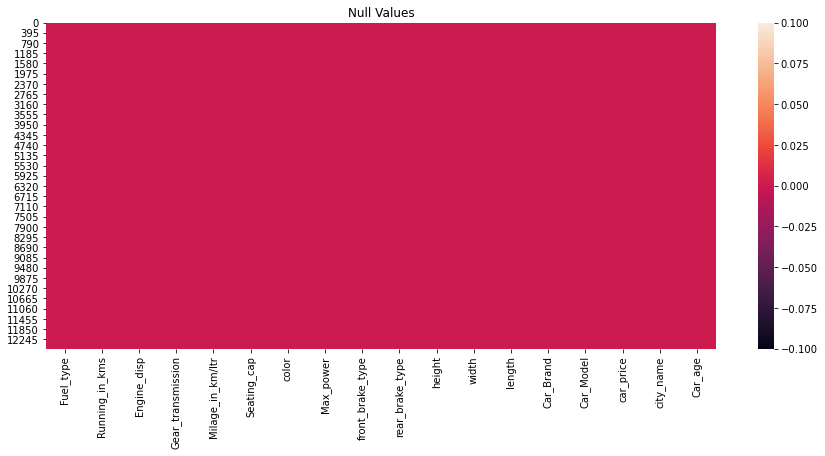

In [48]:
#Visualizing null values
plt.figure(figsize=[15,6])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

## Observations

As we have replaced all null values successfully, there are no null values present in the dataset

In [49]:
#Printing the dataset
df.head()

,Fuel_type,Running_in_kms,Engine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,height,width,length,Car_Brand,Car_Model,car_price,city_name,Car_age
0,Petrol,131125.0,998.0,Manual,21.79,5.0,Grey,67.05,Disc,Drum,1675.0,1620.0,3655.0,Maruti,Wagon R,294000.0,ahmedabad,7.0
1,Petrol,73875.0,1197.0,Manual,18.90,5.0,White,82.00,Disc,Drum,1520.0,1660.0,3765.0,Hyundai,Grand i10,480000.0,ahmedabad,6.0
2,Diesel,97922.0,1498.0,Manual,22.27,5.0,White,108.60,Ventilated Disc,Drum,1467.0,1699.0,4390.0,Volkswagen,Vento,711000.0,ahmedabad,3.0
3,Petrol,24230.0,998.0,Manual,21.70,5.0,Red,67.05,Ventilated Disc,Drum,1564.0,1520.0,3565.0,Maruti,S-Presso,422000.0,ahmedabad,2.0
4,Petrol,41174.0,998.0,Automatic,20.51,5.0,Grey,67.00,Ventilated Disc,Drum,1700.0,1495.0,3599.0,Maruti,Wagon R,430000.0,ahmedabad,4.0


In [50]:
#Checking description of data set
df.describe()

,Running_in_kms,Engine_disp,Milage_in_km/ltr,Seating_cap,Max_power,height,width,length,car_price,Car_age
count,1.260800e+04,12608.000000,12608.000000,12608.000000,12608.000000,12608.000000,12608.000000,12608.000000,1.260800e+04,12608.000000
mean,5.772259e+04,1436.207249,19.556908,5.218036,100.130872,1563.792989,1718.849540,4083.963089,7.709751e+05,6.121352
std,4.027723e+04,494.852497,4.220344,0.693750,44.445694,111.054497,125.361262,398.610518,1.080141e+06,3.143337
min,2.000000e+02,0.000000,0.000000,2.000000,32.500000,148.000000,1410.000000,3099.000000,3.000000e+04,0.000000
25%,3.300000e+04,1197.000000,17.010000,5.000000,74.000000,1488.000000,1675.250000,3765.000000,3.510000e+05,4.000000
50%,5.500000e+04,1248.000000,19.600000,5.000000,86.800000,1520.000000,1700.000000,3995.000000,5.150000e+05,6.000000
75%,7.586225e+04,1498.000000,22.070000,5.000000,113.400000,1630.000000,1765.000000,4413.000000,7.490000e+05,8.000000
max,1.080000e+06,5998.000000,36.000000,10.000000,641.000000,1995.000000,2220.000000,5295.000000,3.080000e+07,35.000000


## Observations

- All the columns have mean higher than the standard deviation. Standard deviation is a measure of how dispersed the data is in relation to the mean. Low standard deviation means data are clustered around the mean.


- Only the 'Milage_in_km/ltr' column have the 50% percentile higher than the mean, which says that the distribution is negatively skewed.


- Al the other columns have mean higher than the 50th percentile. When the mean is greater than the median, the distribution is positively skewed.


- There is a significant difference between the max value and 75th percentile for all the columns, which indicates presence of outliers.

# Visualization:

# Univariate Analysis:

In [51]:
# checking for categorical columns
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['Fuel_type', 'Gear_transmission', 'color', 'front_brake_type', 'rear_brake_type', 'Car_Brand', 'Car_Model', 'city_name']


Above is the list of categorical columns.

In [52]:
# checking for numerical columns
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['Running_in_kms', 'Engine_disp', 'Milage_in_km/ltr', 'Seating_cap', 'Max_power', 'height', 'width', 'length', 'car_price', 'Car_age']


Above is the list of numerical columns.

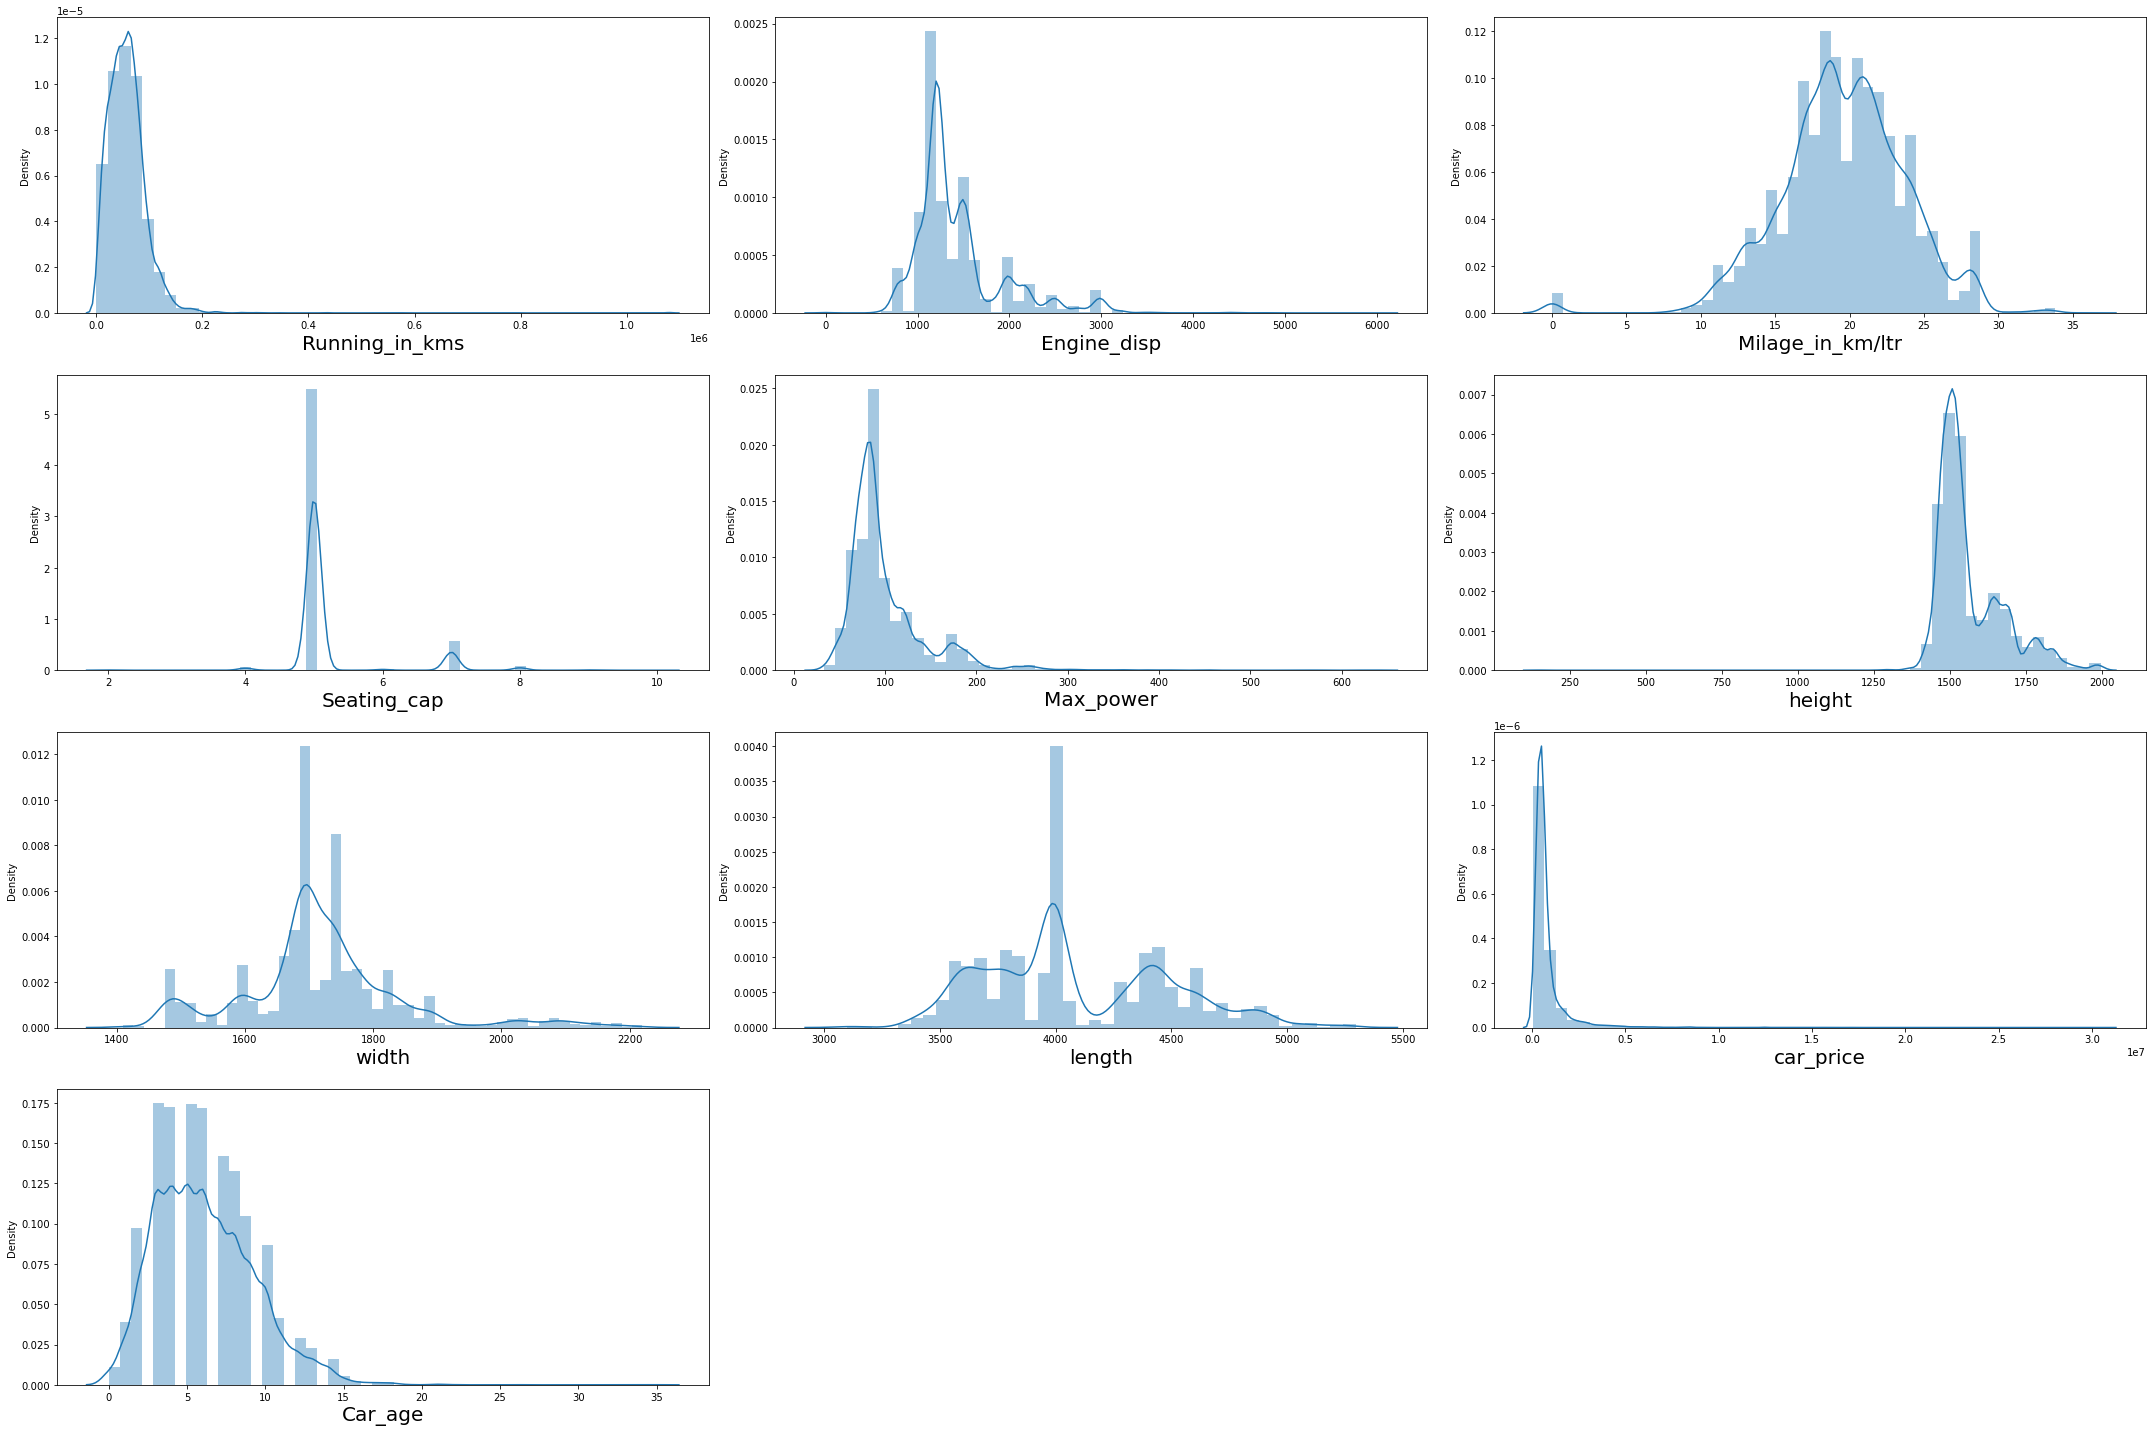

In [53]:
# Plotting the Distribution plot for all numerical columns
plt.figure(figsize = (30,20))
plotnumber = 1
for column in df[numerical_columns]:
    if plotnumber <=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

## Observations

There is skewness in almost all the numerical columns.

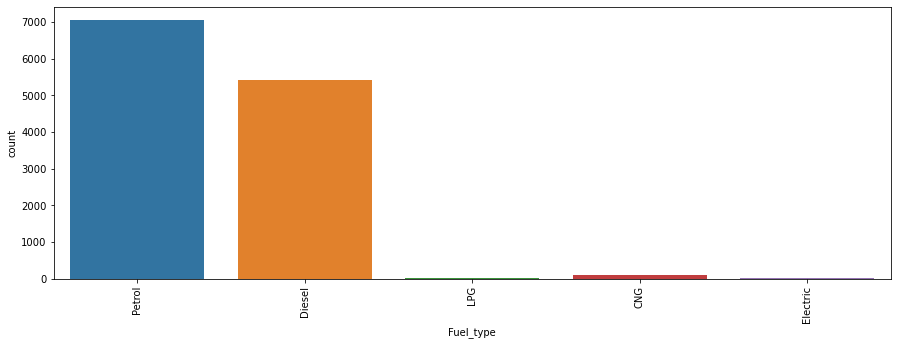

In [54]:
#Count plot for Fuel_type column
plt.figure(figsize=[15,5])
sns.countplot(df['Fuel_type'])
plt.xticks(rotation=90);

## Observations

- Maximum cars are petrol driven and diesel driven cars stand in next position.
- LPG, Electric and CNG are least used fuels for the cars in the given dataset

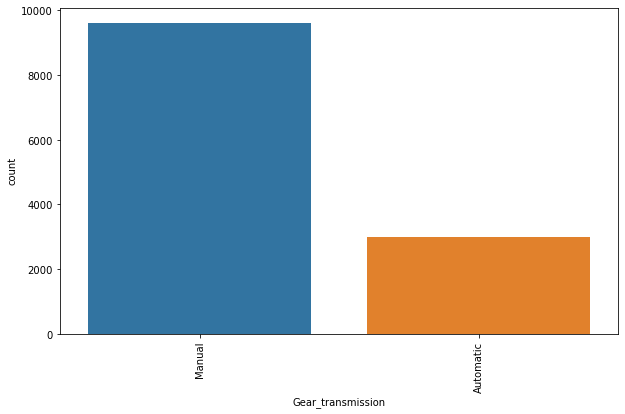

In [55]:
#Count plot for Gear_transmission column
plt.figure(figsize=[10,6])
sns.countplot(df['Gear_transmission'])
plt.xticks(rotation=90);

## Observations

- Most of the cars have Manual gear transmission.
- Only few of the cars have automatic gear transmission compared to the manual transmission.

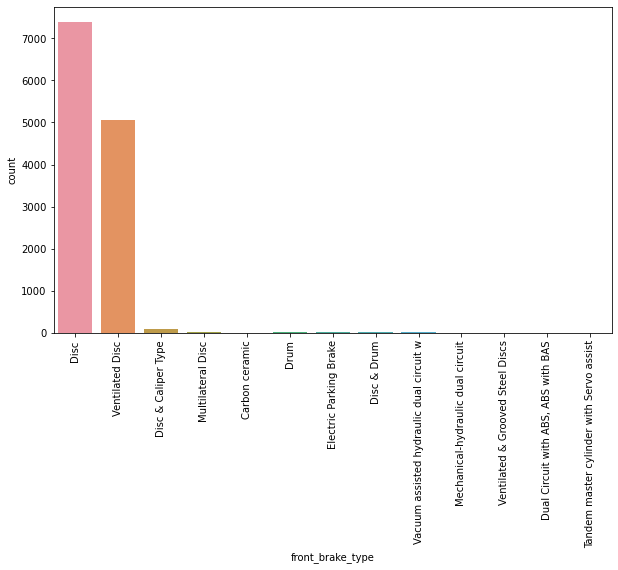

In [56]:
#Count plot for front_brake_type column
plt.figure(figsize=[10,6])
sns.countplot(df['front_brake_type'])
plt.xticks(rotation=90);

## Observations

- Disc front brake cars are more in number followed by Ventilated Disc.

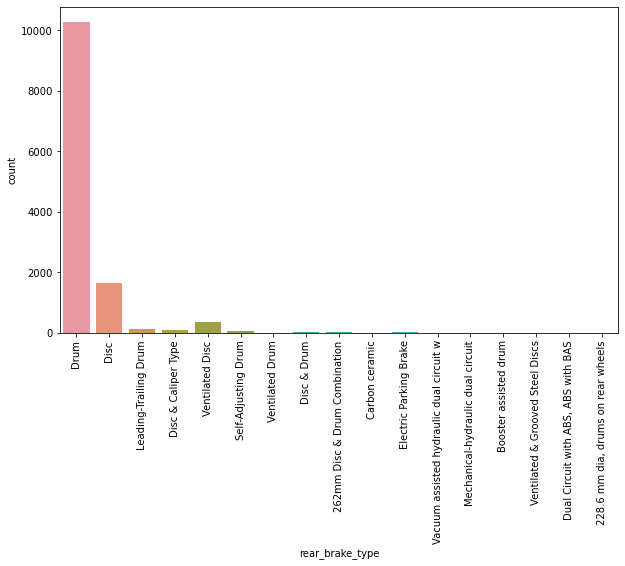

In [57]:
#Count plot for rear_brake_type column
plt.figure(figsize=[10,6])
sns.countplot(df['rear_brake_type'])
plt.xticks(rotation=90);

## Observations

Drum rare break cars are more in number followed by the Disc rear breaks

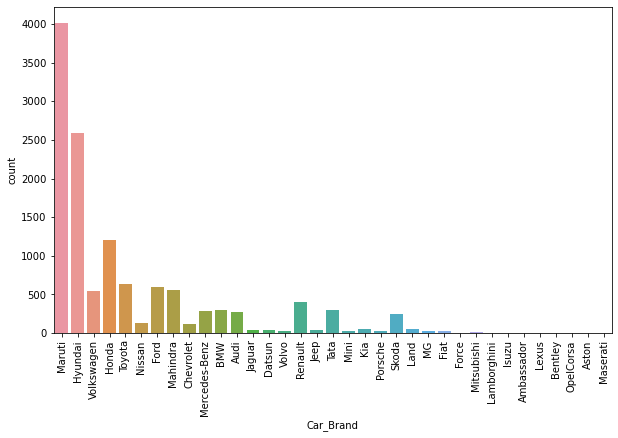

In [58]:
#Count plot for Car_Brand column
plt.figure(figsize=[10,6])
sns.countplot(df['Car_Brand'])
plt.xticks(rotation=90);

## Observations

- Maximum cars under sale in the daatset are Maruti followed by Hyundai.
- Foreign company cars are fewer than the indian made brands

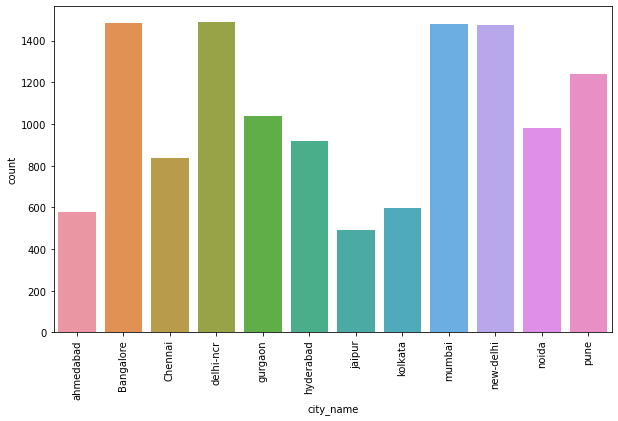

In [59]:
#Count plot for city_name column
plt.figure(figsize=[10,6])
sns.countplot(df['city_name'])
plt.xticks(rotation=90);

## Observations

- In Bangalore,delhi-ncr,mumbai and new-delhi we can find maximum cars for sale. Since these are densly populated places.
- Jaipur and ahmedabad have least number of cars in the dataset

# Bivariate Analysis:

In [60]:
col=['Running_in_kms', 'Engine_disp', 'Milage_in_km/ltr', 'Max_power', 'height', 'width', 'length']

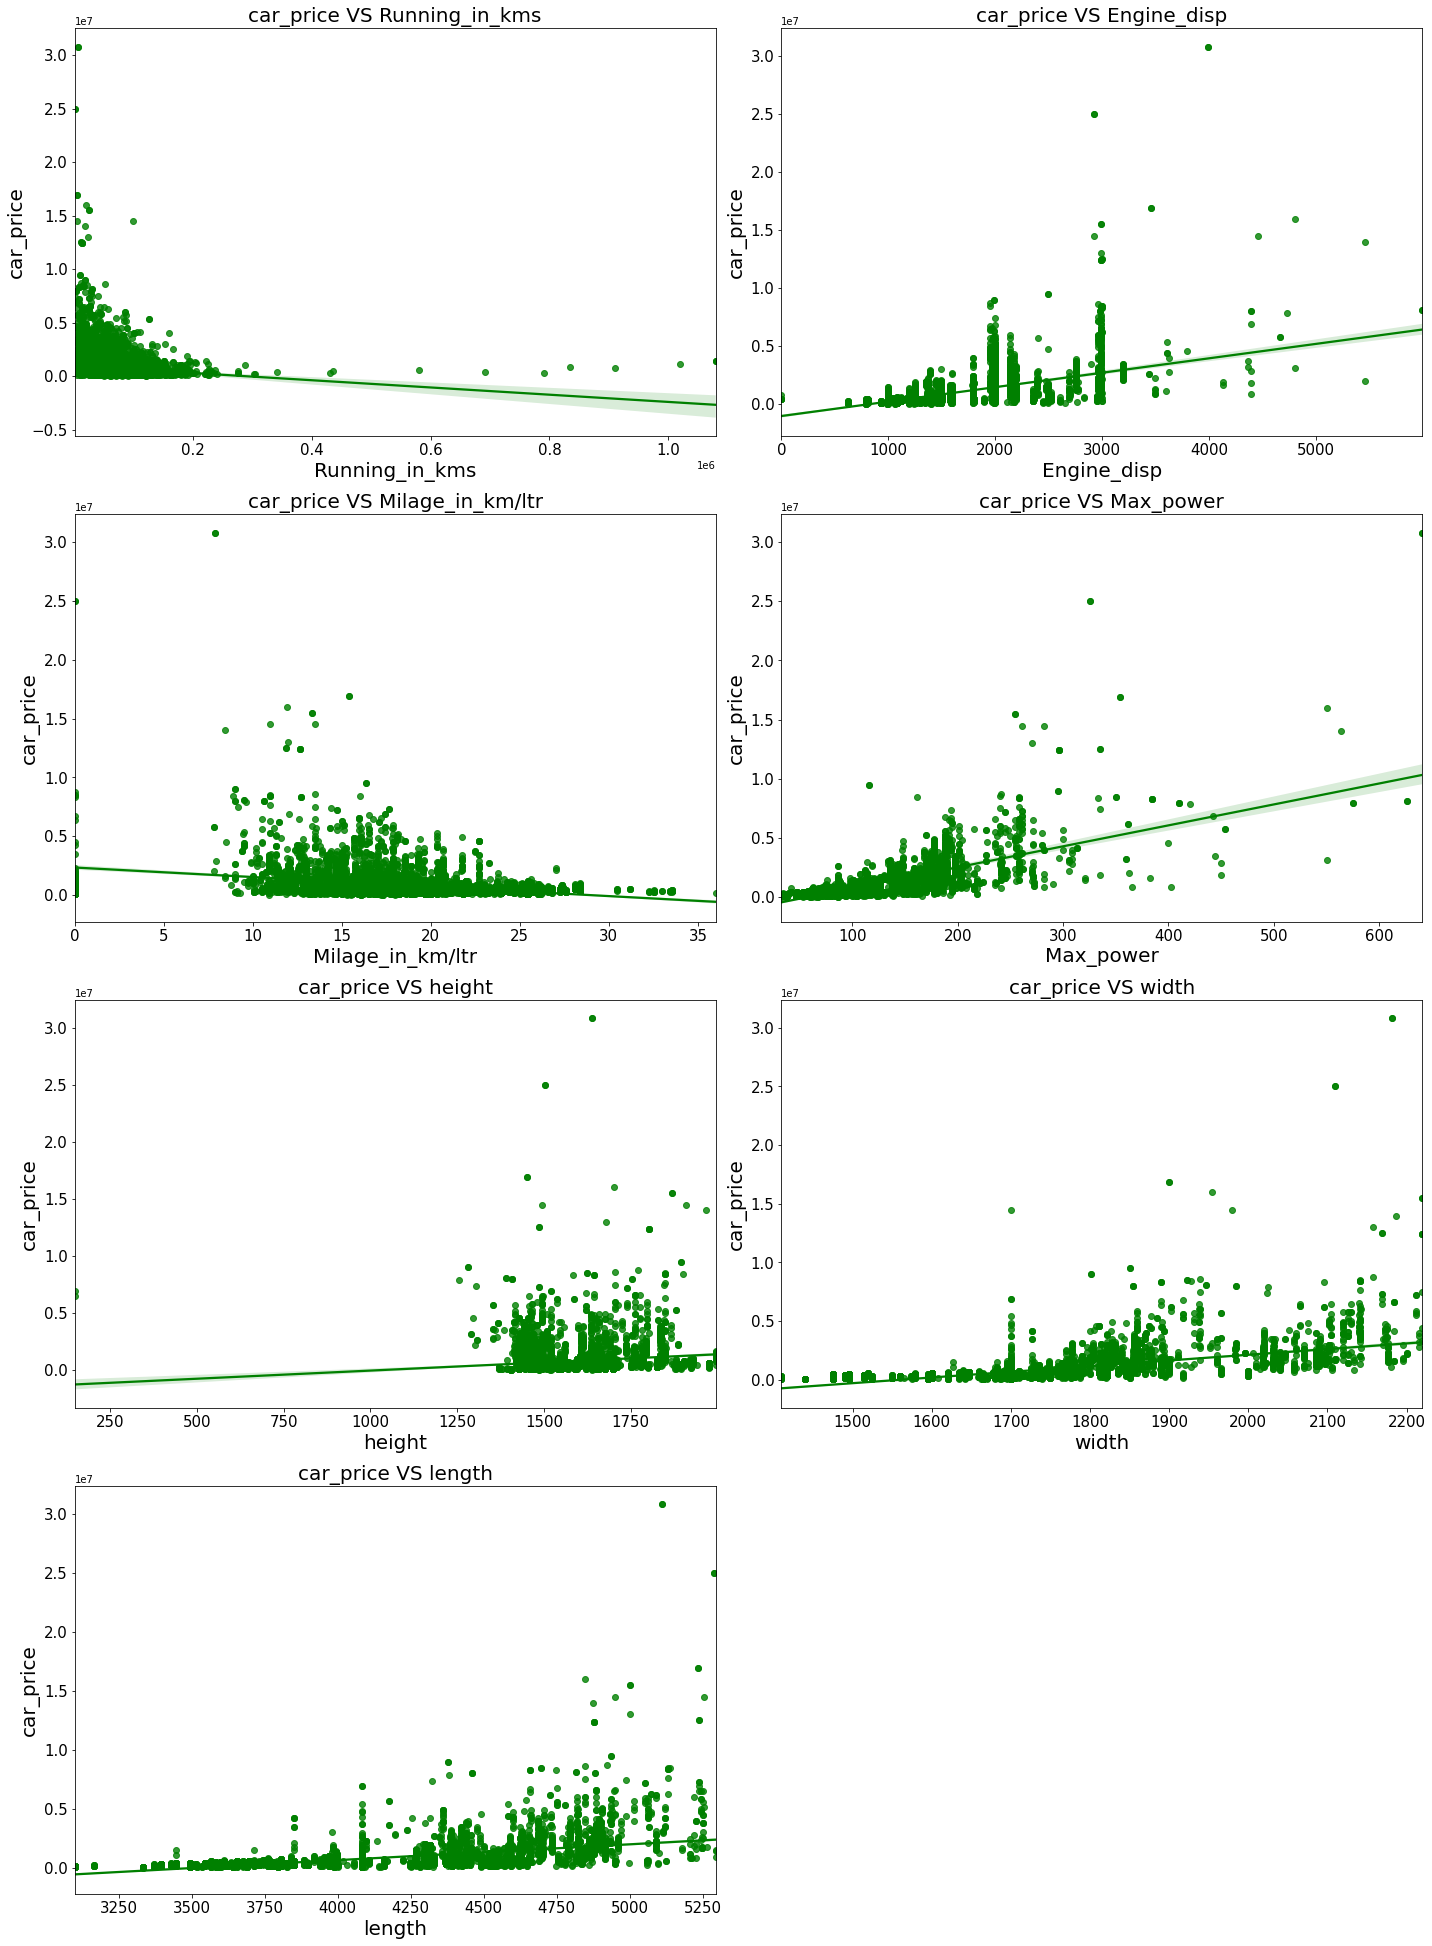

In [61]:
#regplot for numerical columns
plt.figure(figsize=(20,40))
for i in range(len(col)):
    plt.subplot(6,2,i+1)
    sns.regplot(x=df[col[i]] , y=df['car_price'],color="g")
    plt.title(f"car_price VS {col[i]}",fontsize=20)
    plt.xticks(fontsize=15)  
    plt.yticks(fontsize=15)
    plt.xlabel(col[i],fontsize = 20)
    plt.ylabel('car_price',fontsize = 20)
    plt.tight_layout()

## Observations

- Maximum cars are having below 20k driven kms. And car price is high for less driven cars.
- Maximum cars are having 1000-3000 Endine_disp. And car price is high for 3000 Endine_disp.
- Maximum cars are having milage of 10-25kms. And ,milage has no proper relation with car price.
- As Max_power is increasing car price is also increasing.
- Car_price has no proper relation with height.
- As the width is increasing car price is also increasing.
- As length is increasing car price is also increasing.
- Weight also has linear relationship with car price.
- As top_speed is increasing car price is also increasing.

In [62]:
col1=['Seating_cap','Car_age']

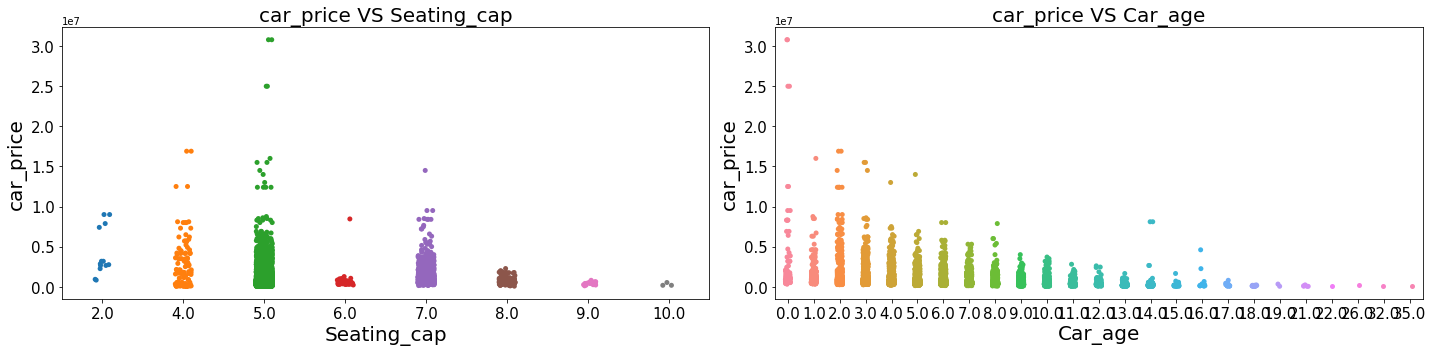

In [63]:
#stripplot for numerical columns
plt.figure(figsize=(20,5))
for i in range(len(col1)):
    plt.subplot(1,2,i+1)
    sns.stripplot(x=df[col1[i]] , y=df['car_price'])
    plt.title(f"car_price VS {col1[i]}",fontsize=20)
    plt.xticks(fontsize=15)  
    plt.yticks(fontsize=15)
    plt.xlabel(col1[i],fontsize = 20)
    plt.ylabel('car_price',fontsize = 20)
    plt.tight_layout()

## Observations

- Cars with 5 and 4 seats are having highest price.
- 5 seater cars have higher prices than the other cars.
- As the age of the car increases the car price decreases. Lesser the age of the car, higher the price.

In [64]:
col2=['Fuel_type', 'Gear_transmission', 'front_brake_type', 'rear_brake_type', 'Car_Brand', 'city_name']

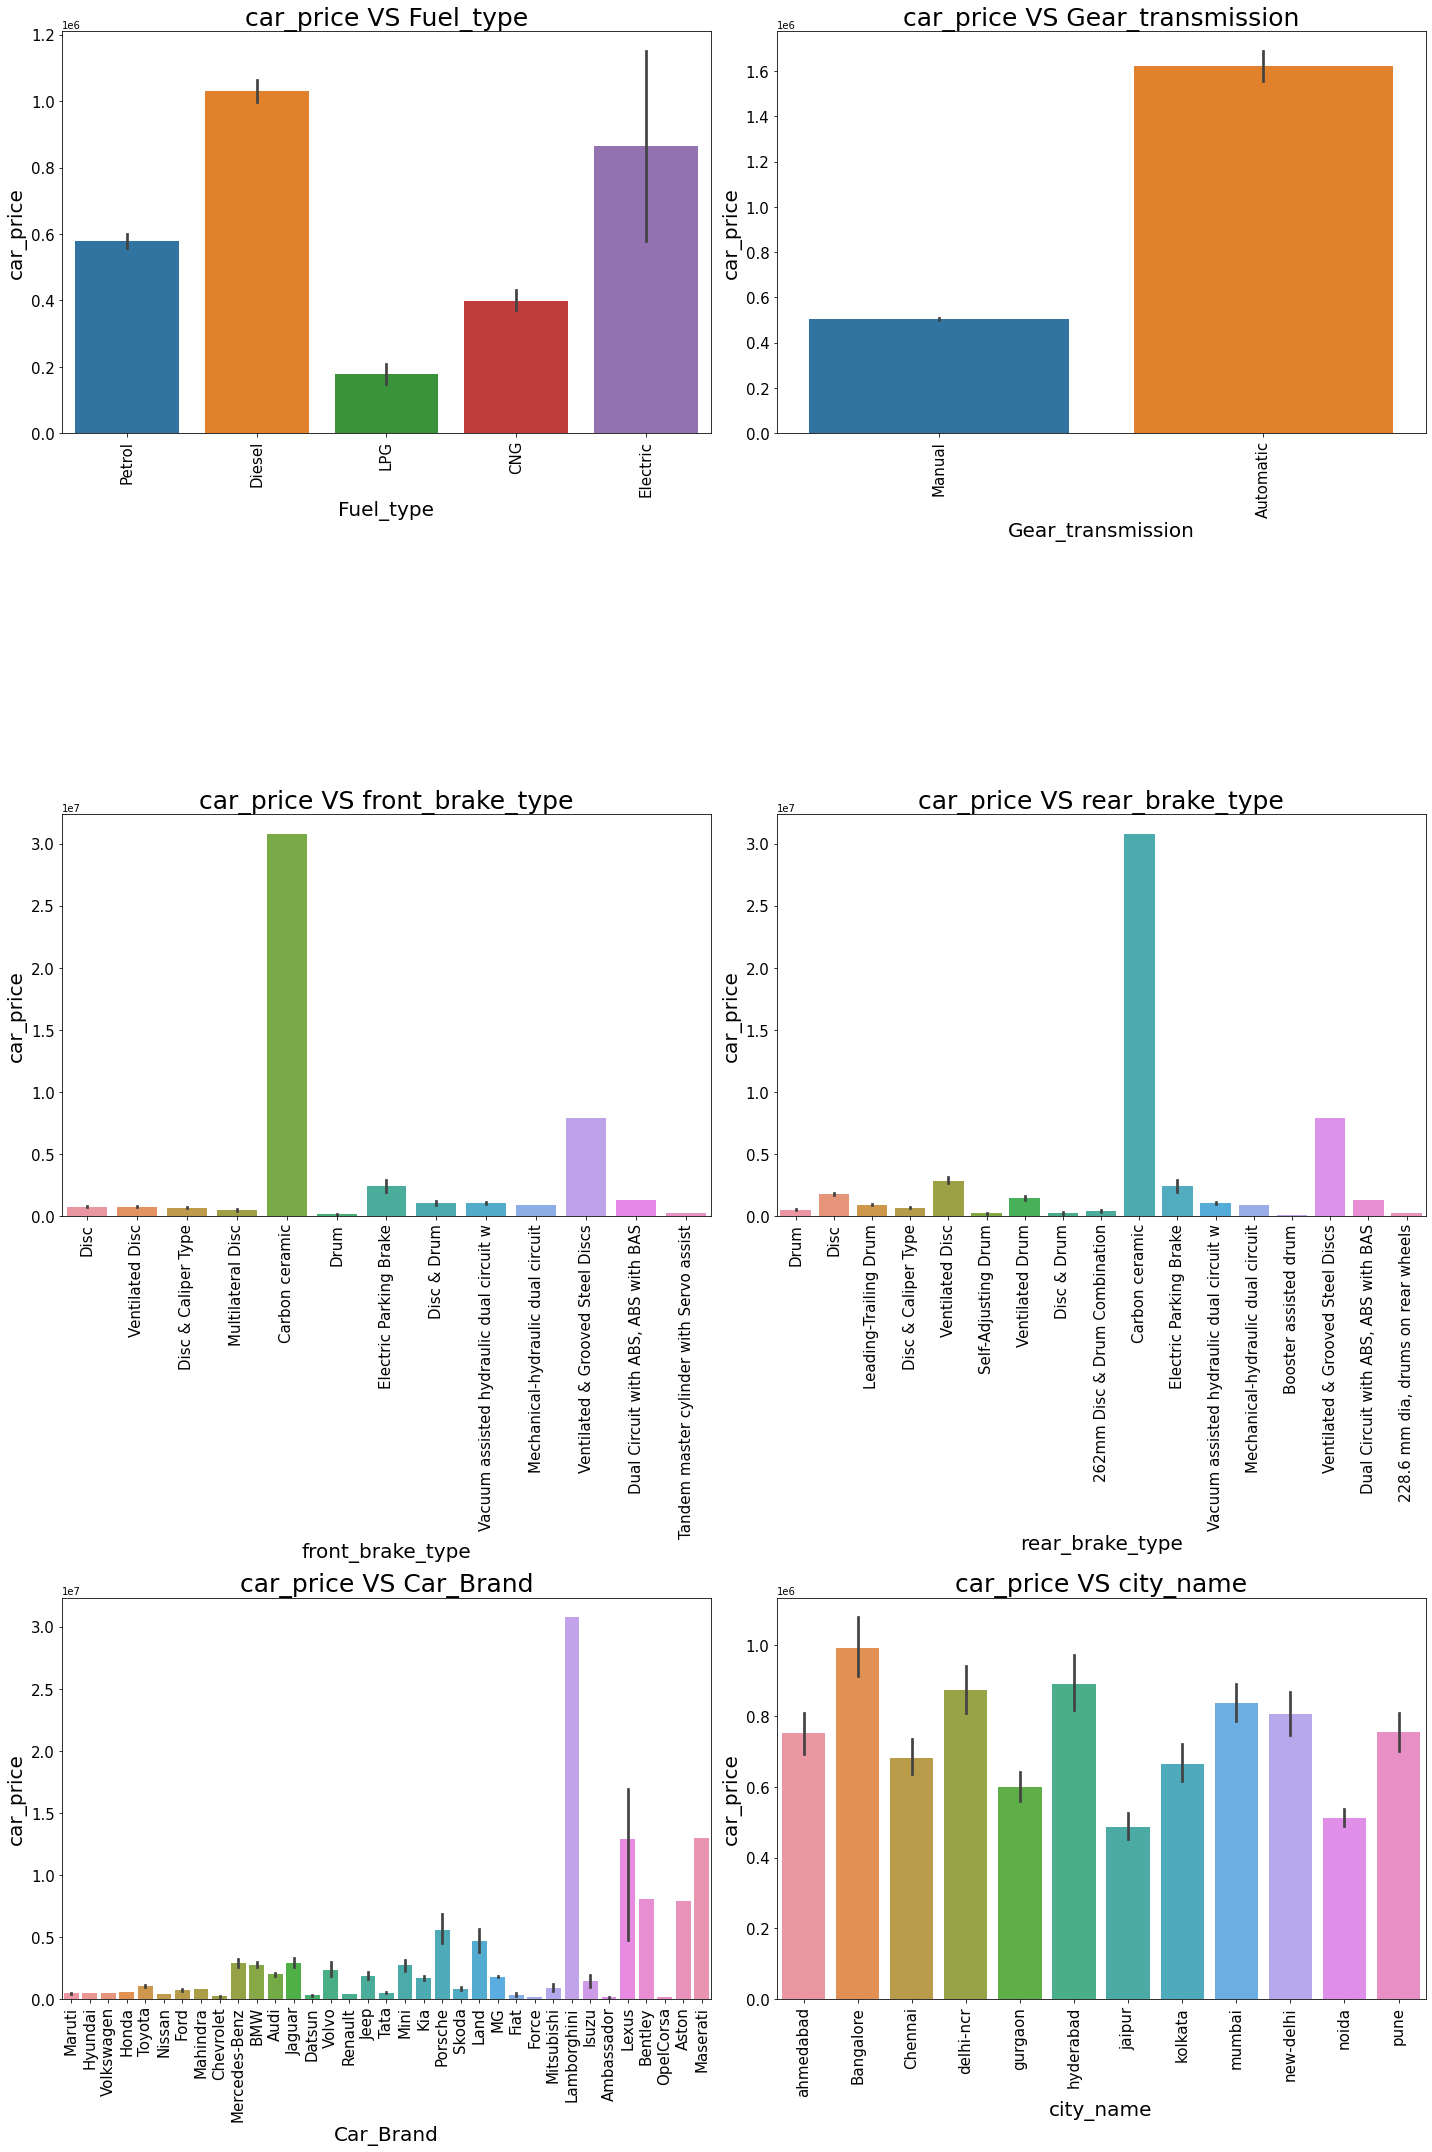

In [65]:
#Bar plot for all categorical columns
plt.figure(figsize=(20,30))
for i in range(len(col2)):
    plt.subplot(3,2,i+1)
    sns.barplot(y=df['car_price'],x=df[col2[i]])
    plt.title(f"car_price VS {col2[i]}",fontsize=25)
    plt.xticks(rotation=90,fontsize=15)  
    plt.yticks(rotation=0,fontsize=15)
    plt.xlabel(col2[i],fontsize = 20)
    plt.ylabel('car_price',fontsize = 20)
    plt.tight_layout()

## Observations

- For Diesel and Electric cars the price is high compared to Petrol,LPG and CNG.
- Cars with automatic gear are costlier than manual gear cars.
- Cars with Carbon Ceramic front break are costlier compared to other cars.
- Cars with carbon Ceramic rear braek are costlier compared to other cars.
- Lamborghini brand cars are having highset sale price.
- In Bangalore, Hyderabad and delhi-ncr the car prices are high as they are highly populated cities.

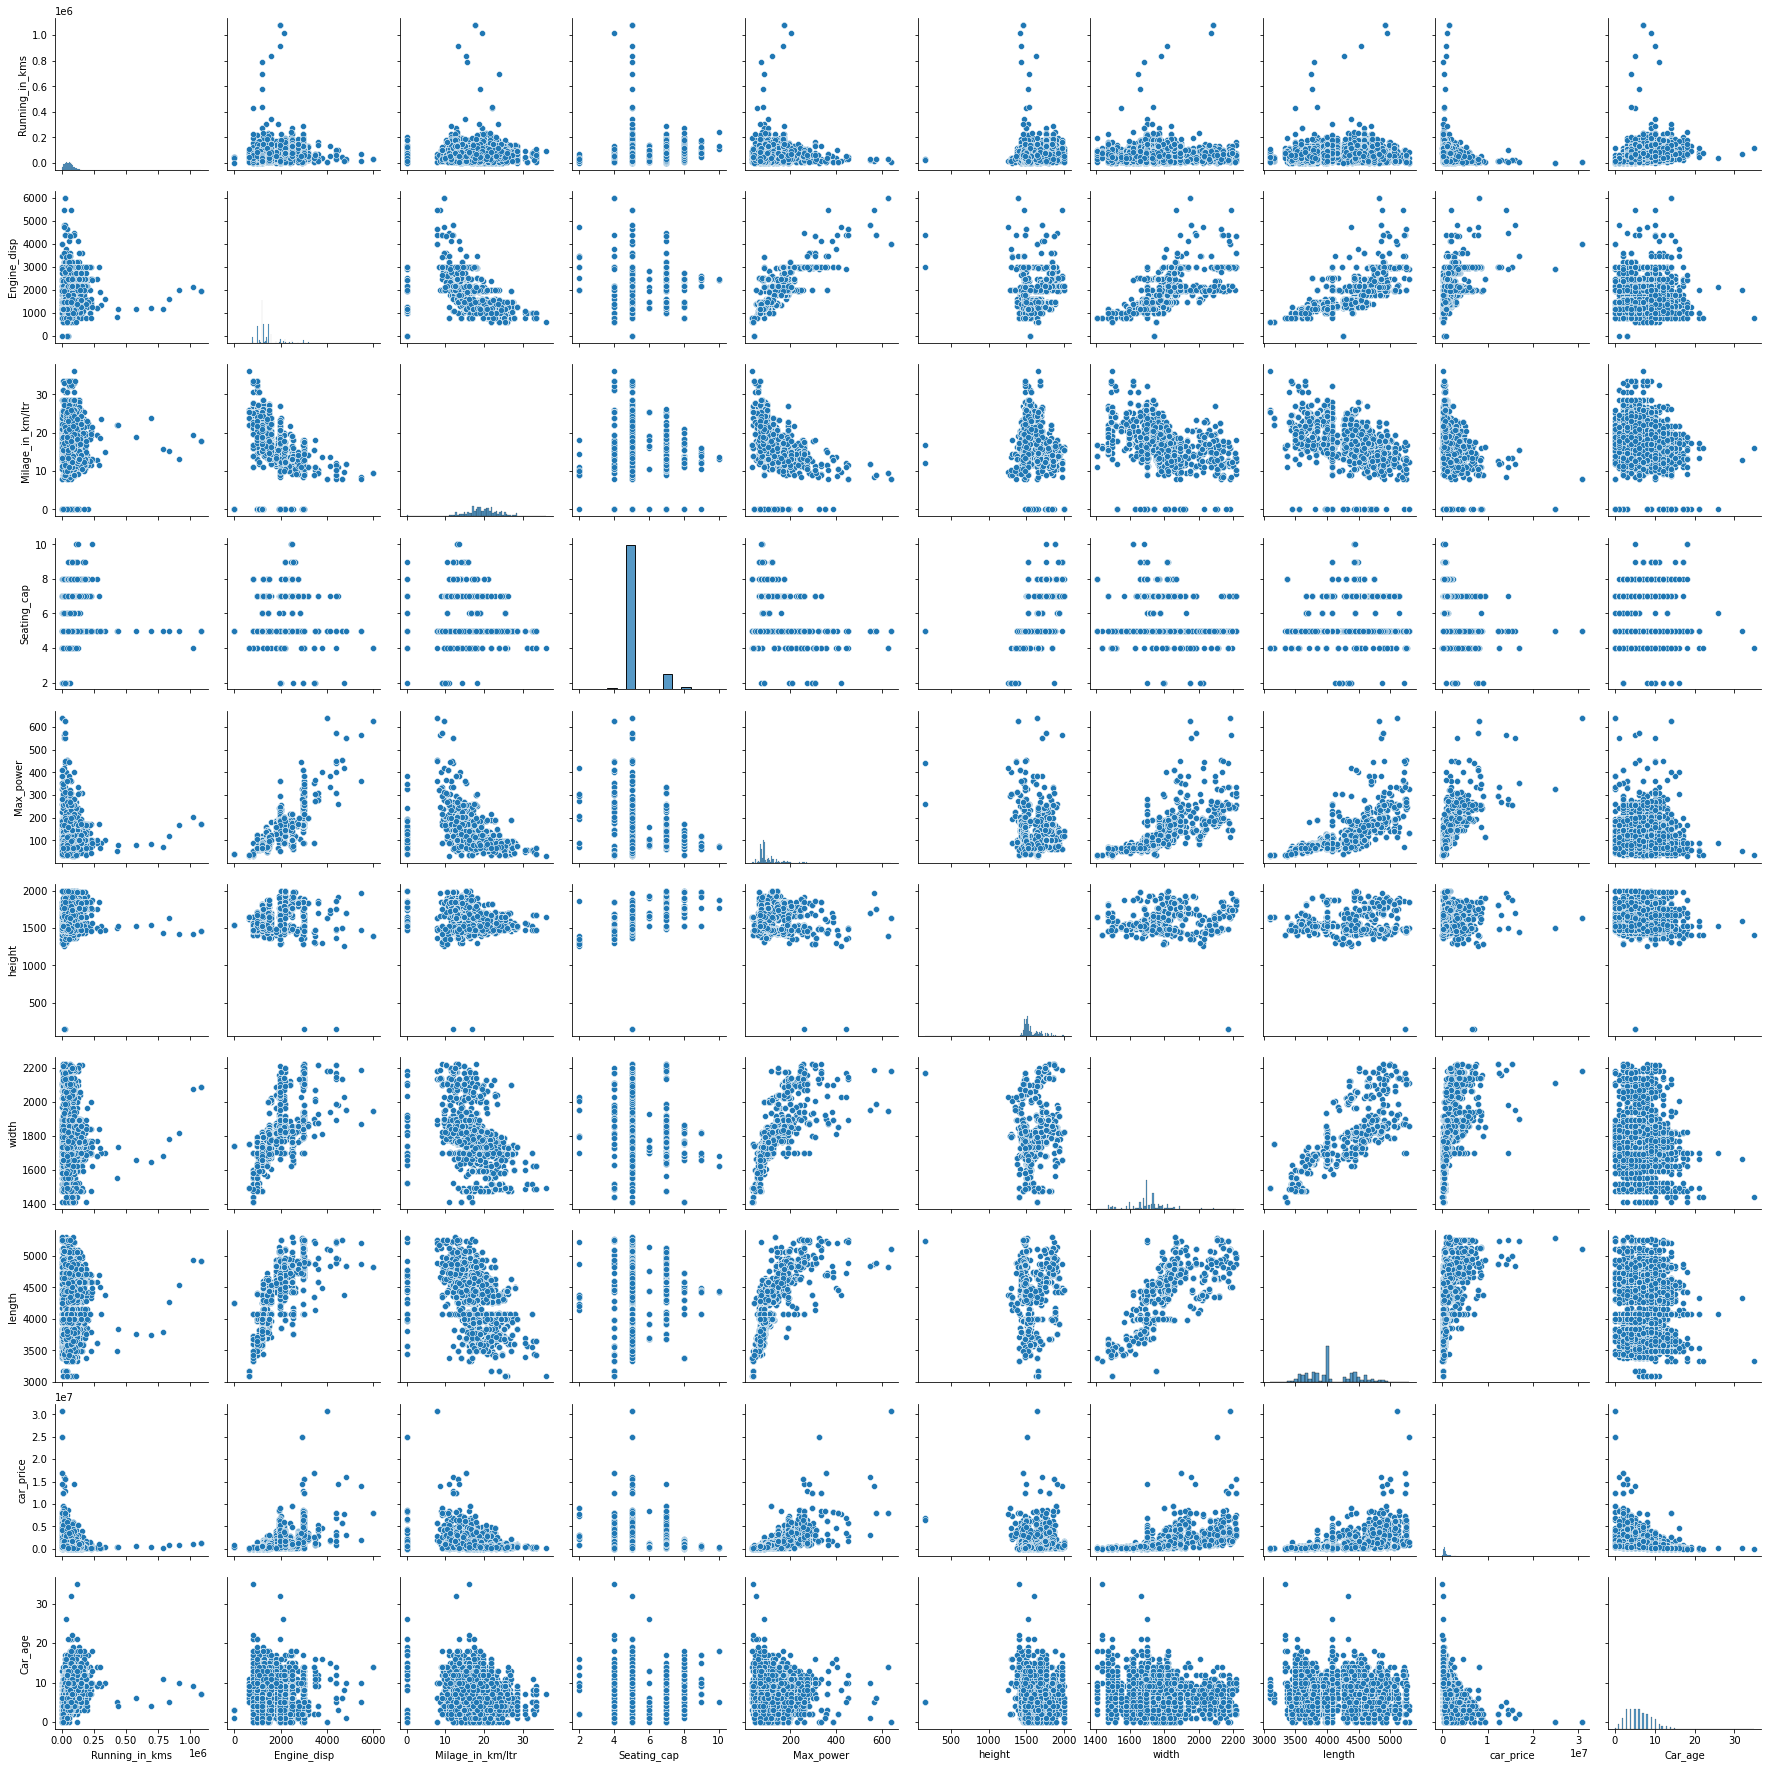

In [66]:
#pair ploting for df
sns.pairplot(df)

## Observations

By looking into the pair plot of pair of features we can notice the presence of outliers in each plot so we have to deal with this in the later steps.

# Checking for outliers:

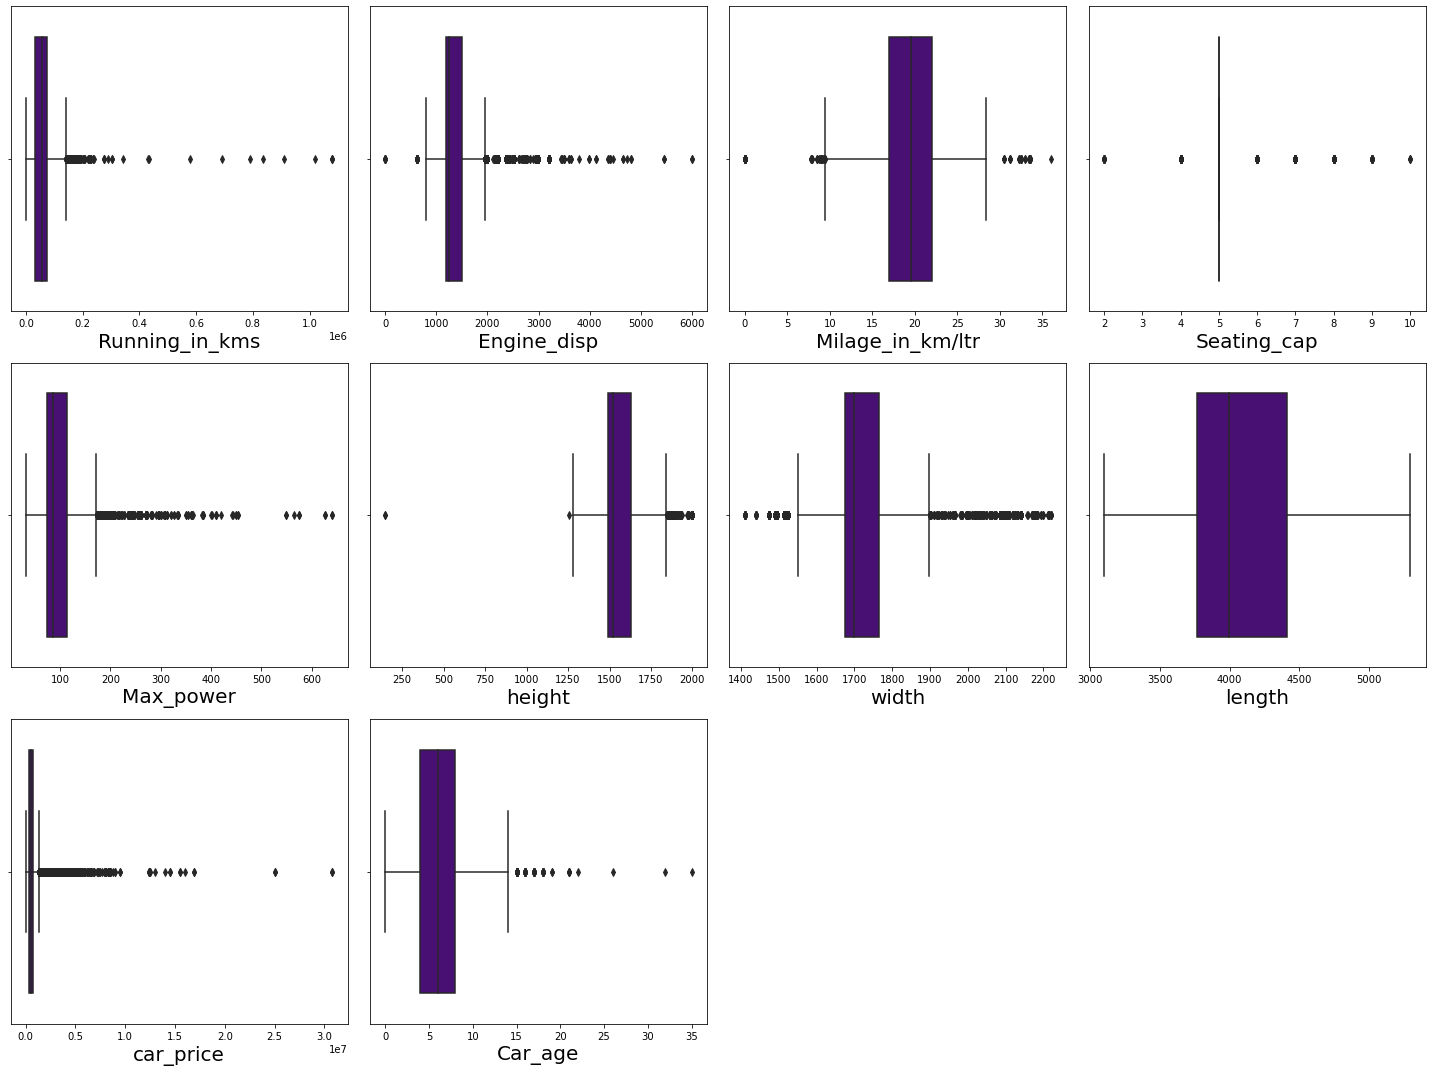

In [67]:
# Identifying the outliers using boxplot

plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for column in numerical_columns:
    if plotnumber<=30:
        ax=plt.subplot(3,4,plotnumber)
        sns.boxplot(df[column],color='indigo')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

## Observations

- There are outliers in all columns except length. 
- Since car_price is our target we should not remove outliers from it.

# Removing Outliers:

# i) Zscore method:

In [68]:
#Features having outliers 
features=df[['Running_in_kms', 'Engine_disp', 'Milage_in_km/ltr', 'Seating_cap', 'Max_power', 'height', 'width', 'Car_age']]

Above are the list of columns with outliers in the dataset.

In [69]:
from scipy.stats import zscore
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new.head()

,Fuel_type,Running_in_kms,Engine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,height,width,length,Car_Brand,Car_Model,car_price,city_name,Car_age
0,Petrol,131125.0,998.0,Manual,21.79,5.0,Grey,67.05,Disc,Drum,1675.0,1620.0,3655.0,Maruti,Wagon R,294000.0,ahmedabad,7.0
1,Petrol,73875.0,1197.0,Manual,18.90,5.0,White,82.00,Disc,Drum,1520.0,1660.0,3765.0,Hyundai,Grand i10,480000.0,ahmedabad,6.0
2,Diesel,97922.0,1498.0,Manual,22.27,5.0,White,108.60,Ventilated Disc,Drum,1467.0,1699.0,4390.0,Volkswagen,Vento,711000.0,ahmedabad,3.0
3,Petrol,24230.0,998.0,Manual,21.70,5.0,Red,67.05,Ventilated Disc,Drum,1564.0,1520.0,3565.0,Maruti,S-Presso,422000.0,ahmedabad,2.0
4,Petrol,41174.0,998.0,Automatic,20.51,5.0,Grey,67.00,Ventilated Disc,Drum,1700.0,1495.0,3599.0,Maruti,Wagon R,430000.0,ahmedabad,4.0


In [70]:
#Checking shape of new dataset
df_new.shape

(11657, 18)

The new dataset has 11657 rows and 18 columns.

In [71]:
#Checking shape of old dataset
df.shape

(12608, 18)

Previously the dataset has 12608 rows and 18 columns.

In [72]:
#Checking dataloss in zscore method
Dataloss = (((12608-11657)/12608)*100)
Dataloss

7.542829949238579

In Z-score method the data loss is less than 10%. Let us have a look into IQR method to remove outliers.

# ii) IQR method:

In [73]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df_1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

We have removed the skewness of the dataset using IQR method.

In [74]:
#Checking shape of new dataset
df_1.shape

(8725, 18)

The new dataset has 8725 rows and 18 columns.

In [75]:
#Checking shape of old dataset
df.shape

(12608, 18)

Previously the dataset has 12608 rows and 18 columns.

In [76]:
#Checking dataloss in IQR method of the dataset
Dataloss = (((12608-8725)/12608)*100)
Dataloss

30.797906091370557

In IQR method the data loss is more than 10%. So let us continue with the dataset obtained after removing the outliers using Z-score method

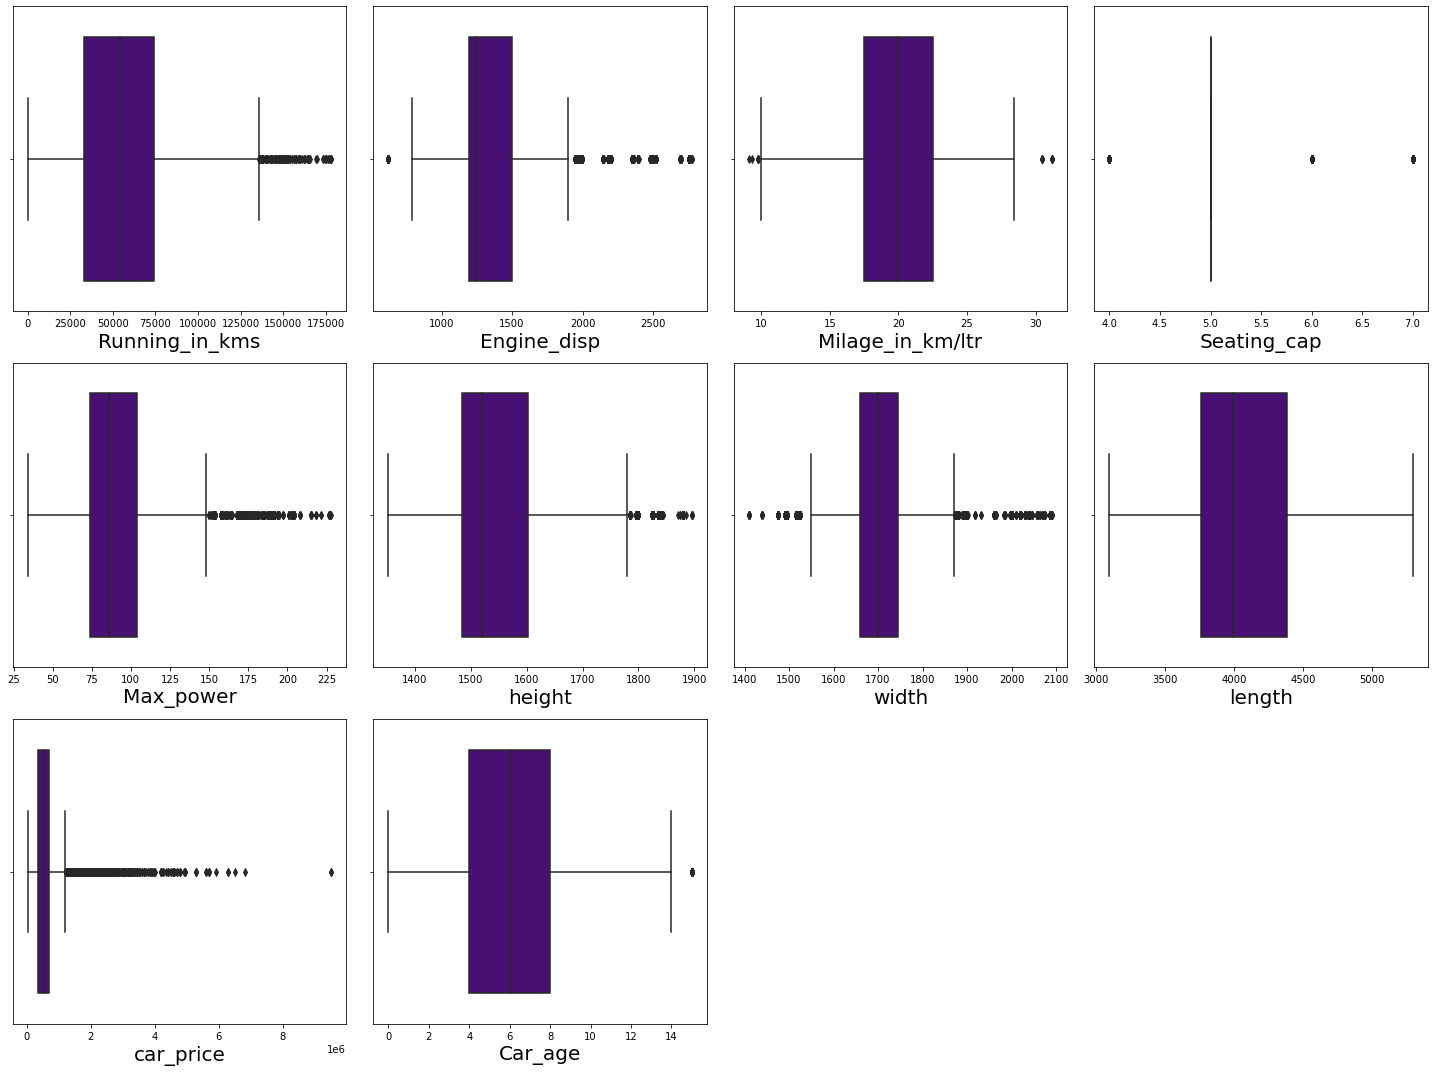

In [77]:
# Checking if the outliers are reduced

plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for column in numerical_columns:
    if plotnumber<=30:
        ax=plt.subplot(3,4,plotnumber)
        sns.boxplot(df_new[column],color='indigo')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

## Observations

Outliers has been reduced in all the columns.

# Checking for skewness:

In [78]:
# Now checking for numerical columns
num_columns=[]
for i in df_new.dtypes.index:
    if df_new.dtypes[i]!='object':
        num_columns.append(i)
print(num_columns)

['Running_in_kms', 'Engine_disp', 'Milage_in_km/ltr', 'Seating_cap', 'Max_power', 'height', 'width', 'length', 'car_price', 'Car_age']


In [79]:
#Checking for skewness in the dataset
df_new[num_columns].skew()

Running_in_kms      0.557609
Engine_disp         1.322739
Milage_in_km/ltr    0.079676
Seating_cap         3.028409
Max_power           1.409836
height              1.275817
width               0.381738
length              0.409327
car_price           4.069770
Car_age             0.485301
dtype: float64

## Observations

We can notice there is skewness in all the numerical columns except Milage_in_km/ltr,width,length and Car_age. So we have to remove this skewness. Since car_price is my target no need to remove skewness in this column.

# Removing skewness using yeo-johnson method:

In [80]:
#Creating a list of skewed features
fea=['Running_in_kms', 'Engine_disp', 'Seating_cap', 'Max_power', 'height']

Taking a list as fea with all the columns with skewness.

In [81]:
# Removing skewness
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

Using yeo_johnson method for removing the skewness.

In [82]:
df_new[fea] = scaler.fit_transform(df_new[fea].values)

Got removed from skewness.

In [83]:
#Checking skewness again
df_new[fea].skew()

Running_in_kms   -0.067269
Engine_disp      -0.023585
Seating_cap      -1.588158
Max_power        -0.024164
height            0.000000
dtype: float64

## Observations

In all the columns skewness has reduced and in height column skewness is zero after removing which means this column has single entry throught out. So let us drop this column as it has no impact on model building.

In [84]:
#Droping height column
df_new = df_new.drop(["height"],axis=1)

# Label Encoding:

In [85]:
# Separating categorical columns in df_new
cat_col=[]
for i in df_new.dtypes.index:
    if df_new.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Fuel_type', 'Gear_transmission', 'color', 'front_brake_type', 'rear_brake_type', 'Car_Brand', 'Car_Model', 'city_name']


Above are the list of categorical columns in df_new.

In [86]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df_new[cat_col]= df_new[cat_col].apply(LE.fit_transform)

In [87]:
df_new[cat_col].head()

,Fuel_type,Gear_transmission,color,front_brake_type,rear_brake_type,Car_Brand,Car_Model,city_name
0,4,1,64,0,5,17,186,2
1,4,1,163,0,5,8,89,2
2,1,1,163,6,5,26,178,2
3,4,1,125,6,5,17,142,2
4,4,0,64,6,5,17,186,2


Using label encoder we have encoded the categorical columns.

# Correlation

In [88]:
# Checking correlation
cor=df_new.corr()
cor

,Fuel_type,Running_in_kms,Engine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,width,length,Car_Brand,Car_Model,car_price,city_name,Car_age
Fuel_type,1.000000,-0.363945,-0.471699,0.025136,-0.296387,-0.209881,-0.022484,-0.291857,-0.079265,0.145259,-0.450686,-0.388495,-0.019693,-0.049746,-0.259962,0.001462,0.005921
Running_in_kms,-0.363945,1.000000,0.230672,0.112245,0.004170,0.099851,0.047985,0.087395,0.127323,-0.008620,0.093010,0.164753,0.003438,0.039774,-0.203328,0.012961,0.531894
Engine_disp,-0.471699,0.230672,1.000000,-0.328223,-0.481663,0.326677,-0.020807,0.894647,0.049591,-0.341595,0.763400,0.843988,-0.092950,0.004066,0.540460,-0.020389,0.056813
Gear_transmission,0.025136,0.112245,-0.328223,1.000000,0.307897,0.009509,0.025971,-0.439458,0.023750,0.229150,-0.340643,-0.354620,0.063166,0.101954,-0.495043,0.027232,0.116829
Milage_in_km/ltr,-0.296387,0.004170,-0.481663,0.307897,1.000000,-0.213999,-0.004647,-0.513468,0.026566,0.207954,-0.305911,-0.422680,0.094383,-0.000978,-0.279612,0.035684,-0.226008
Seating_cap,-0.209881,0.099851,0.326677,0.009509,-0.213999,1.000000,0.013078,0.228783,-0.009978,-0.028265,0.201982,0.291513,0.085157,0.046753,0.112843,-0.020176,-0.067724
color,-0.022484,0.047985,-0.020807,0.025971,-0.004647,0.013078,1.000000,-0.032854,-0.005270,0.007275,-0.018960,-0.032669,-0.004926,0.039580,-0.022555,0.020729,-0.002310
Max_power,-0.291857,0.087395,0.894647,-0.439458,-0.513468,0.228783,-0.032854,1.000000,-0.015231,-0.379676,0.786063,0.846457,-0.191847,-0.001558,0.623250,-0.014704,-0.049027
front_brake_type,-0.079265,0.127323,0.049591,0.023750,0.026566,-0.009978,-0.005270,-0.015231,1.000000,0.134949,-0.045858,-0.007966,0.040921,-0.047310,-0.044011,0.014359,0.193678
rear_brake_type,0.145259,-0.008620,-0.341595,0.229150,0.207954,-0.028265,0.007275,-0.379676,0.134949,1.000000,-0.308911,-0.345018,0.026280,-0.047736,-0.298504,0.020994,-0.011253


## Observations

Above are the correlations of all the pair of features.To get better visualization on the correlation of features, let us plot it using heat map.

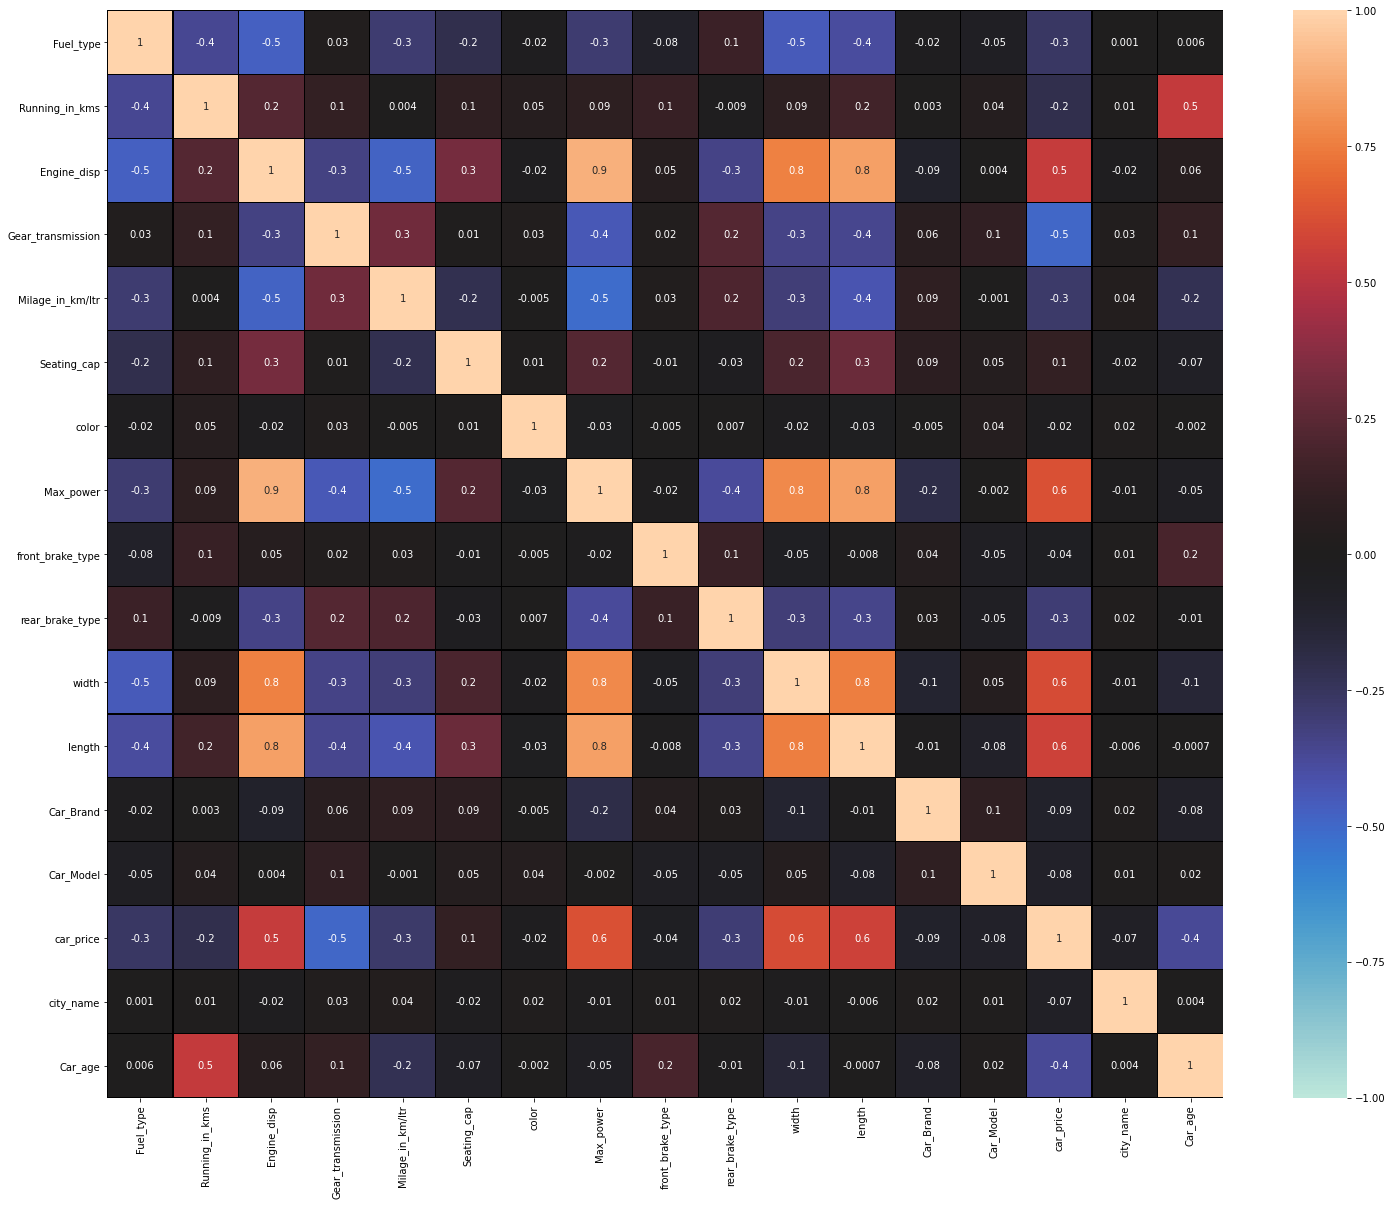

In [89]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(25,20))
sns.heatmap(df_new.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="icefire")
plt.yticks(rotation=0);

## Observations

- Most of the columns in the darker shades are near by zero, which says they donot have much impact on the dataset.

- We can notice there is multicolinearity issue in the dataset. So we have to use VIF to remove multicolinearity.

- Width, lngth, and max power are highly correlated with the engine_disp column which causes multicollinearity in the model 

- Our target column 'Car_price' is highly correlated with Width, lngth, and max power

- 'Gear_transmission' is highly negatively correlated with the target column 'Car_price'.

- The columns 'color', 'front_brake_type', 'Car_brand', 'Car_model', 'city_name' have near zero correlation with the target colunn which says there is no impact on the target column due to any change in these columns

Let's visualize the correlation of all the features with target to get better insight.

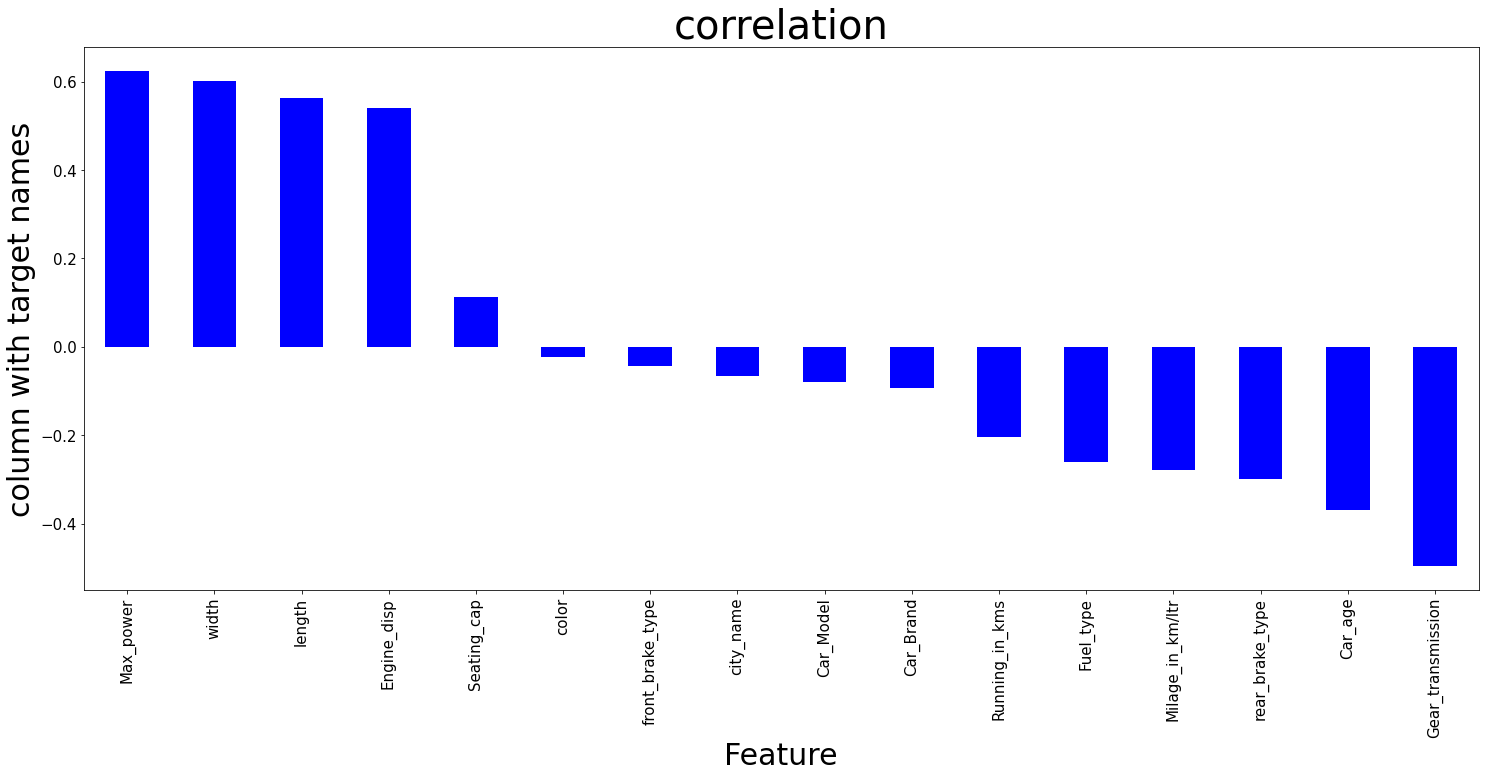

In [90]:
# visualizing the correlation of all the features with target 
plt.figure(figsize=(25,10))
df_new.corr()['car_price'].sort_values(ascending=False).drop(['car_price']).plot(kind='bar',color='b')
plt.xlabel('Feature',fontsize=30)
plt.ylabel('column with target names',fontsize=30)
plt.xticks(fontsize=15)  
plt.yticks(fontsize=15)
plt.title('correlation',fontsize=40)
plt.show()

## Observations

color is less correlated with target. But will keep it and continue.

# Separating Features and Target:

In [91]:
# Separating the target and features
x = df_new.drop("car_price",axis=1)
y = df_new["car_price"]

We have separated my target and independent columns.

# Scaling 

In [92]:
# Scaling the data using Standard scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

I have scaled my data using Standard scaler.

In [93]:
#Viewing the top 5 columns in X after scaling
X.head()

,Fuel_type,Running_in_kms,Engine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,width,length,Car_Brand,Car_Model,city_name,Car_age
0,0.828736,2.122981,-1.162401,0.523307,0.481631,-0.182728,-0.936759,-0.974446,-0.817784,0.263798,-0.790275,-1.060221,0.463506,1.146270,-0.995738,0.336510
1,0.828736,0.675606,-0.332179,0.523307,-0.318875,-0.182728,1.060064,-0.235563,-0.817784,0.263798,-0.424068,-0.761750,-0.858620,-0.374916,-0.995738,0.000519
2,-1.198808,1.324161,0.585258,0.523307,0.614588,-0.182728,1.060064,0.678634,1.233038,0.263798,-0.067016,0.934107,1.785632,1.020811,-0.995738,-1.007454
3,0.828736,-1.038907,-1.162401,0.523307,0.456702,-0.182728,0.293607,-0.974446,1.233038,0.263798,-1.705794,-1.304424,0.463506,0.456247,-0.995738,-1.343444
4,0.828736,-0.364909,-1.162401,-1.910925,0.127082,-0.182728,-0.936759,-0.977324,1.233038,0.263798,-1.934674,-1.212170,0.463506,1.146270,-0.995738,-0.671463


This is the data of independent variables after scaling.

# Checking for multicolinearity issue using VIF:

In [94]:
# checking the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,3.016718,Fuel_type
1,1.773652,Running_in_kms
2,9.457321,Engine_disp
3,1.368716,Gear_transmission
4,2.867009,Milage_in_km/ltr
5,1.274229,Seating_cap
6,1.011934,color
7,9.589635,Max_power
8,1.097505,front_brake_type
9,1.231269,rear_brake_type


In [95]:
#Droping columns with high VIF
X = X.drop(["Max_power"],axis=1)

In [96]:
# Checking the VIF of the dataset again
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,2.774992,Fuel_type
1,1.773414,Running_in_kms
2,5.902581,Engine_disp
3,1.302289,Gear_transmission
4,2.866997,Milage_in_km/ltr
5,1.261341,Seating_cap
6,1.011725,color
7,1.097449,front_brake_type
8,1.215609,rear_brake_type
9,3.176195,width


We can see that the "Engine_disp" has high VIF, Hence we shall drop this column for better model building

In [97]:
#Droping columns with high VIF
X = X.drop(["Engine_disp"],axis=1)

In [98]:
# Checking the VIF of the dataset again
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,2.318471,Fuel_type
1,1.763102,Running_in_kms
2,1.302241,Gear_transmission
3,2.305033,Milage_in_km/ltr
4,1.254257,Seating_cap
5,1.010636,color
6,1.080208,front_brake_type
7,1.209721,rear_brake_type
8,2.974388,width
9,3.121165,length


Now we can see that the multicolinearity issue is solved.

# Finding Best Random State and Accuracy:

In [99]:
#importing necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [100]:
# Finding Best Random State and Accuracy
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = RandomForestRegressor()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9633628934196624  on Random_state  8


We have got the best accuracy and random state.

## Creating Train test split

In [101]:
# Train test splitting the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)

Created train test split.

# Regression Algorithms:

In [102]:
#importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor
from xgboost import XGBRegressor
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics

# i) RandomForestRegressor:

In [103]:
RFR=RandomForestRegressor()
RFR.fit(X_train,y_train)
pred=RFR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(RFR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 96.24309718113597
mean_squared_error: 13343319258.574087
mean_absolute_error: 57808.42825605562
root_mean_squared_error: 115513.28606949977

Cross validation score : 93.01825638123728

R2_Score - Cross Validation Score : 3.2248407998986863


RFR is giving 96.24% r2_score.

# ii) XGBRegressor:

In [104]:
XGB=XGBRegressor()
XGB.fit(X_train,y_train)
pred=XGB.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(XGB, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 97.10845957621967
mean_squared_error: 10269828335.682026
mean_absolute_error: 55197.8550416086
root_mean_squared_error: 101340.1615139922

Cross validation score : 92.90590742501206

R2_Score - Cross Validation Score : 4.2025521512076125


XGBRegressor is giving 97.10% r2_score.

# iii) GradientBoostingRegressor:

In [105]:
GBR=GradientBoostingRegressor()
GBR.fit(X_train,y_train)
pred=GBR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(GBR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 93.12768539007554
mean_squared_error: 24408267210.199486
mean_absolute_error: 87750.42444333046
root_mean_squared_error: 156231.45397198186

Cross validation score : 89.74508273759753

R2_Score - Cross Validation Score : 3.3826026524780133


GradientBoostingRegressor is giving 93.12% r2_score.

# iv) DecisionTreeRegressor:

In [106]:
DTR=DecisionTreeRegressor()
DTR.fit(X_train,y_train)
pred=DTR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(DTR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 93.17091264475825
mean_squared_error: 24254737803.74087
mean_absolute_error: 66098.62550028588
root_mean_squared_error: 155739.32645205857

Cross validation score : 87.54990624741913

R2_Score - Cross Validation Score : 5.621006397339116


DecisionTreeRegressor is giving 93.17% r2_score.

# v) Bagging Regressor:

In [107]:
BR=BaggingRegressor()
BR.fit(X_train,y_train)
pred=BR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(BR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 94.17486869218727
mean_squared_error: 20689006479.74771
mean_absolute_error: 64832.85456995834
root_mean_squared_error: 143836.73550156687

Cross validation score : 92.46857232597438

R2_Score - Cross Validation Score : 1.7062963662128965


Bagging Regressor is giving 94.17% r2_score.



The XGBReggressor has 97.10 as r2_score but has a higher difference between the r2_score and the Cross validation score than the Random forest regressor


**By evaluating based on the difference of model accuracy i.e., r2_score and cross validation score we can say that RandomForestRegressor as the best model with 96.24% r2_score.**

# Hyper parameter tunning for best model:

In [108]:
#importing necessary libraries
from sklearn.model_selection import GridSearchCV

In [109]:
parameter = {'n_estimators':[30,60,80],
             'max_depth': [10,20,40],
             'min_samples_leaf':[1,2,5,10,20,30],
             'min_samples_split':[5,10,20],
             'criterion':['mse','mae'],
             'max_features':["auto","sqrt","log2"]}

Giving RandomForestRegressor parameters.

In [110]:
GCV=GridSearchCV(RandomForestRegressor(),parameter,cv=5,n_jobs = -1,verbose = 1)

Running grid search CV for RandomForestRegressor.

In [111]:
#Running grid search CV for RFR
GCV.fit(X_train,y_train)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [10, 20, 40],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5, 10, 20, 30],
                         'min_samples_split': [5, 10, 20],
                         'n_estimators': [30, 60, 80]},
             verbose=1)

Tunning the model using GCV.

In [112]:
#Getting the best parameters
GCV.best_params_

{'criterion': 'mae',
 'max_depth': 40,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 80}

Got the best parameters for RandomForestRegressor.

In [113]:
Best_model=RandomForestRegressor(criterion='mae',max_features='log2',min_samples_split=5,n_estimators=80,max_depth= 40, min_samples_leaf= 1)
Best_model.fit(X_train,y_train)
pred=Best_model.predict(X_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2_Score: 94.61499485464296
mean_squared_error: 19125818880.05539
mean_absolute_error: 66146.4632647227
RMSE value: 138296.12749479065


**This is the final model with 94.61% as r2_score after tuning which is good.**

# Saving the model:

In [114]:
# Saving the model using .pkl
import joblib
joblib.dump(Best_model,"Used_Car_Price.pkl")

['Used_Car_Price.pkl']

We have saved the model as Used_Car_Price Using .pkl

# Predictions:

In [115]:
# Loading the saved model
model=joblib.load("Used_Car_Price.pkl")

#Prediction
prediction = model.predict(X_test)
prediction

array([232950.  , 271400.  , 300725.  , ..., 232987.5 , 282168.75,
       400862.5 ])

In [116]:
#Creating a dataaframe for the predicted vs actual values
pd.DataFrame([model.predict(X_test)[:],y_test[:]],index=["Predicted","Actual"])

0         1         2          3         4         5     \
Predicted  232950.0  271400.0  300725.0  349631.25  319975.0  428150.0   
Actual     350000.0  230000.0  296000.0  342000.00  330000.0  475000.0   

               6          7           8          9          10        11    \
Predicted  541562.5  826418.75  1832068.75  674406.25  452718.75  264675.0   
Actual     575000.0  789000.00  2275000.00  755000.00  446000.00  245000.0   

                12         13         14         15         16         17    \
Predicted  597256.25  399931.25  796631.25  439693.75  342081.25  328581.25   
Actual     500000.00  395000.00  775000.00  390000.00  325000.00  300000.00   

               18        19         20         21        22         23    \
Predicted  539062.5  209300.0  700106.25  663418.75  787700.0  542056.25   
Actual     440000.0  300000.0  670000.00  632000.00  780000.0  540000.00   

                24         25          26          27         28         29    \
Predicted  1465025.0  420268.75  2072693.75  1958706.25  553868.75  432093.75   
Actual     1550000.0  382000.00  2190000.00  2200000.00  536000.00  415000.00   

                30         31        32         33         34         35    \
Predicted  337043.75  545331.25  329537.5  356256.25  1165925.0  593593.75   
Actual     235000.00  540000.00  290000.0  364000.00  1299000.0  585000.00   

                 36         37        38         39        40         41    \
Predicted  1666256.25  519081.25  676925.0  419568.75  407487.5  660568.75   
Actual     1975000.00  338000.00  642000.0  475000.00  391000.0  693000.00   

               42        43         44         45          46         47    \
Predicted  292950.0  371137.5  336856.25  792718.75   914818.75  525831.25   
Actual     254000.0  355000.0  420000.00  770000.00  1000000.00  499000.00   

               48         49        50        51        52         53    \
Predicted  842162.5  671668.75  366812.5  384612.5  490812.5  546393.75   
Actual     860000.0  730000.00  340000.0  370000.0  560000.0  545000.00   

                54         55        56        57        58         59    \
Predicted  189843.75  645781.25  317862.5  201062.5  261300.0  588418.75   
Actual     165000.00  628000.00  230000.0  167000.0  255000.0  449000.00   

                60        61         62         63        64         65    \
Predicted  456956.25  593550.0  716281.25  2107925.0  685112.5  395118.75   
Actual     477000.00  650000.0  850000.00  2250000.0  700000.0  368000.00   

               66         67        68        69        70          71    \
Predicted  575737.5  360931.25  655612.5  215975.0  222387.5  222494.375   
Actual     550000.0  369000.00  680000.0  165000.0  147000.0  180000.000   

                72        73          74        75        76          77    \
Predicted  613881.25  396437.5  1975756.25  412687.5  275587.5  1437856.25   
Actual     645000.00  368000.0  1649000.00  375000.0  285000.0  1399000.00   

               78         79        80        81        82         83    \
Predicted  634300.0  620093.75  311562.5  347437.5  225712.5  412968.75   
Actual     625000.0  690000.00  330000.0  332000.0  215000.0  411000.00   

               84        85          86        87        88         89    \
Predicted  271337.5  615387.5  1714106.25  193700.0  635262.5  256918.75   
Actual     245000.0  595000.0  1690000.00  200000.0  591000.0  400000.00   

                90         91         92        93        94        95    \
Predicted  406181.25  3699087.5  397543.75  337562.5  546725.0  235212.5   
Actual     409000.00  4599000.0  284000.00  325000.0  601000.0  245000.0   

               96        97          98         99        100        101   \
Predicted  583662.5  521875.0  1644856.25  617481.25  265275.0  2362587.5   
Actual     625000.0  579000.0  1350000.00  890000.00  233000.0  2500000.0   

                102        103         104       105       106        107 

Above are the predicted values and the actual values, which look similarwith a few exceptions

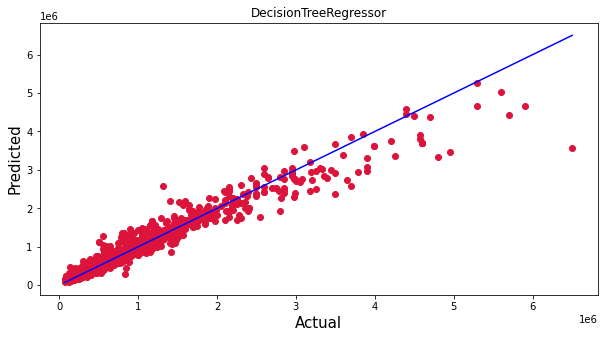

In [117]:
# plotting a graph for the actual values vs predicted values
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction, c='crimson')
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("DecisionTreeRegressor")
plt.show()

## Observation

We have plotted the Actual vs Predicted. To get better insights - Bule line is the actual line and red dots are the predicted values


We can observe that the predicted values are nearby the actual values which says the model built works well.